In [1]:
%load_ext watermark


In [2]:
from IPython.display import display, HTML
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from teeplot import teeplot as tp
from tqdm import tqdm

from pylib._seed_global_rngs import seed_global_rngs


Covasim 3.1.6 (2024-01-28) — © 2020-2024 by IDM


In [3]:
%watermark -diwmuv -iv


Last updated: 2025-05-16T09:54:36.768221+00:00

Python implementation: CPython
Python version       : 3.10.12
IPython version      : 7.31.1

Compiler    : GCC 11.4.0
OS          : Linux
Release     : 6.8.0-1027-azure
Machine     : x86_64
Processor   : x86_64
CPU cores   : 4
Architecture: 64bit

seaborn   : 0.13.2
pandas    : 2.2.3
numpy     : 2.1.2
matplotlib: 3.9.2
teeplot   : 1.4.2

Watermark: 2.4.3



In [4]:
teeplot_subdir = "2025-05-15-vanilla-mut-screen"
teeplot_subdir


'2025-05-15-vanilla-mut-screen'

In [5]:
seed_global_rngs(1)


## Get Data


In [6]:
df = pd.read_parquet("https://osf.io/f96j7/download")


In [7]:
df["replicate_uuid"].nunique()


15

In [8]:
df["is_focal_mutation"] = df["mut_char_pos"] == 0


In [9]:
df["tb_stat"].unique()


['clade duration ratio', 'clade fblr ratio', 'clade growth ratio', 'clade size ratio', 'num_leaves', 'divergence_from_root', 'origin_time']
Categories (7, object): ['clade duration ratio', 'clade fblr ratio', 'clade growth ratio', 'clade size ratio', 'num_leaves', 'divergence_from_root', 'origin_time']

In [10]:
df["screen_name"].unique()


['combined_f20n50', 'combined_f20n75', 'naive50', 'naive75', 'fisher20', 'ctrl_fisher20', 'ctrl_naive75', 'covaphast_variant', 'sequence_diff']
Categories (9, object): ['combined_f20n50', 'combined_f20n75', 'naive50', 'naive75', ..., 'ctrl_fisher20', 'ctrl_naive75', 'covaphast_variant', 'sequence_diff']

In [11]:
stats = (
    "binom_p",
    "binom_stat",
    "trinom_p",
    "trinom_stat",
    "trinom_p_fill0",
    "trinom_stat_fill0",
    "mw_p",
    "cliffs_delta",
    "mw_p_dropna",
    "cliffs_delta_dropna",
)


In [12]:
records = []
groups = df[
    (df["trt_hsurf_bits"] == 0)
    & (df["trt_n_downsample"] == df["trt_n_downsample"].max())
    & (df["tb_stat"].str.contains("ratio"))
].groupby(
    [
        "trt_name",
        "replicate_uuid",
        "screen_uuid",
        "screen_min_leaves",
        "screen_name",
        "tb_stat",
    ],
    observed=True,
)
for (
    trt_name,
    replicate_uuid,
    screen_uuid,
    screen_min_leaves,
    screen_name,
    tb_stat,
), grp in tqdm(
    groups,
):
    grp_focal = grp[grp["is_focal_mutation"]].copy().reset_index(drop=True)

    record = {
        "trt_name": trt_name,
        "replicate_uuid": replicate_uuid,
        "screen_uuid": screen_uuid,
        "screen_min_leaves": screen_min_leaves,
        "screen_name": screen_name,
        "tb_stat": tb_stat,
    }

    records.append(
        {
            **record,
            **{
                stat: (
                    np.nan if len(grp_focal) == 0 else grp_focal[stat].item()
                )
                for stat in stats
            },
            **{"mutation": "focal"},
        },
    )

    try:
        grp_nonfocal = (
            grp[~grp["is_focal_mutation"]]
            .copy()
            .sample(n=200, replace=True)
            .reset_index(drop=True)
        )
        for __, row in grp_nonfocal.iterrows():
            records.append(
                {
                    **record,
                    **{stat: row[stat] for stat in stats},
                    **{"mutation": "nonfocal"},
                },
            )
    except ValueError:
        pass


100%|██████████| 1080/1080 [00:16<00:00, 66.40it/s]


In [13]:
data = pd.DataFrame(records)


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.png


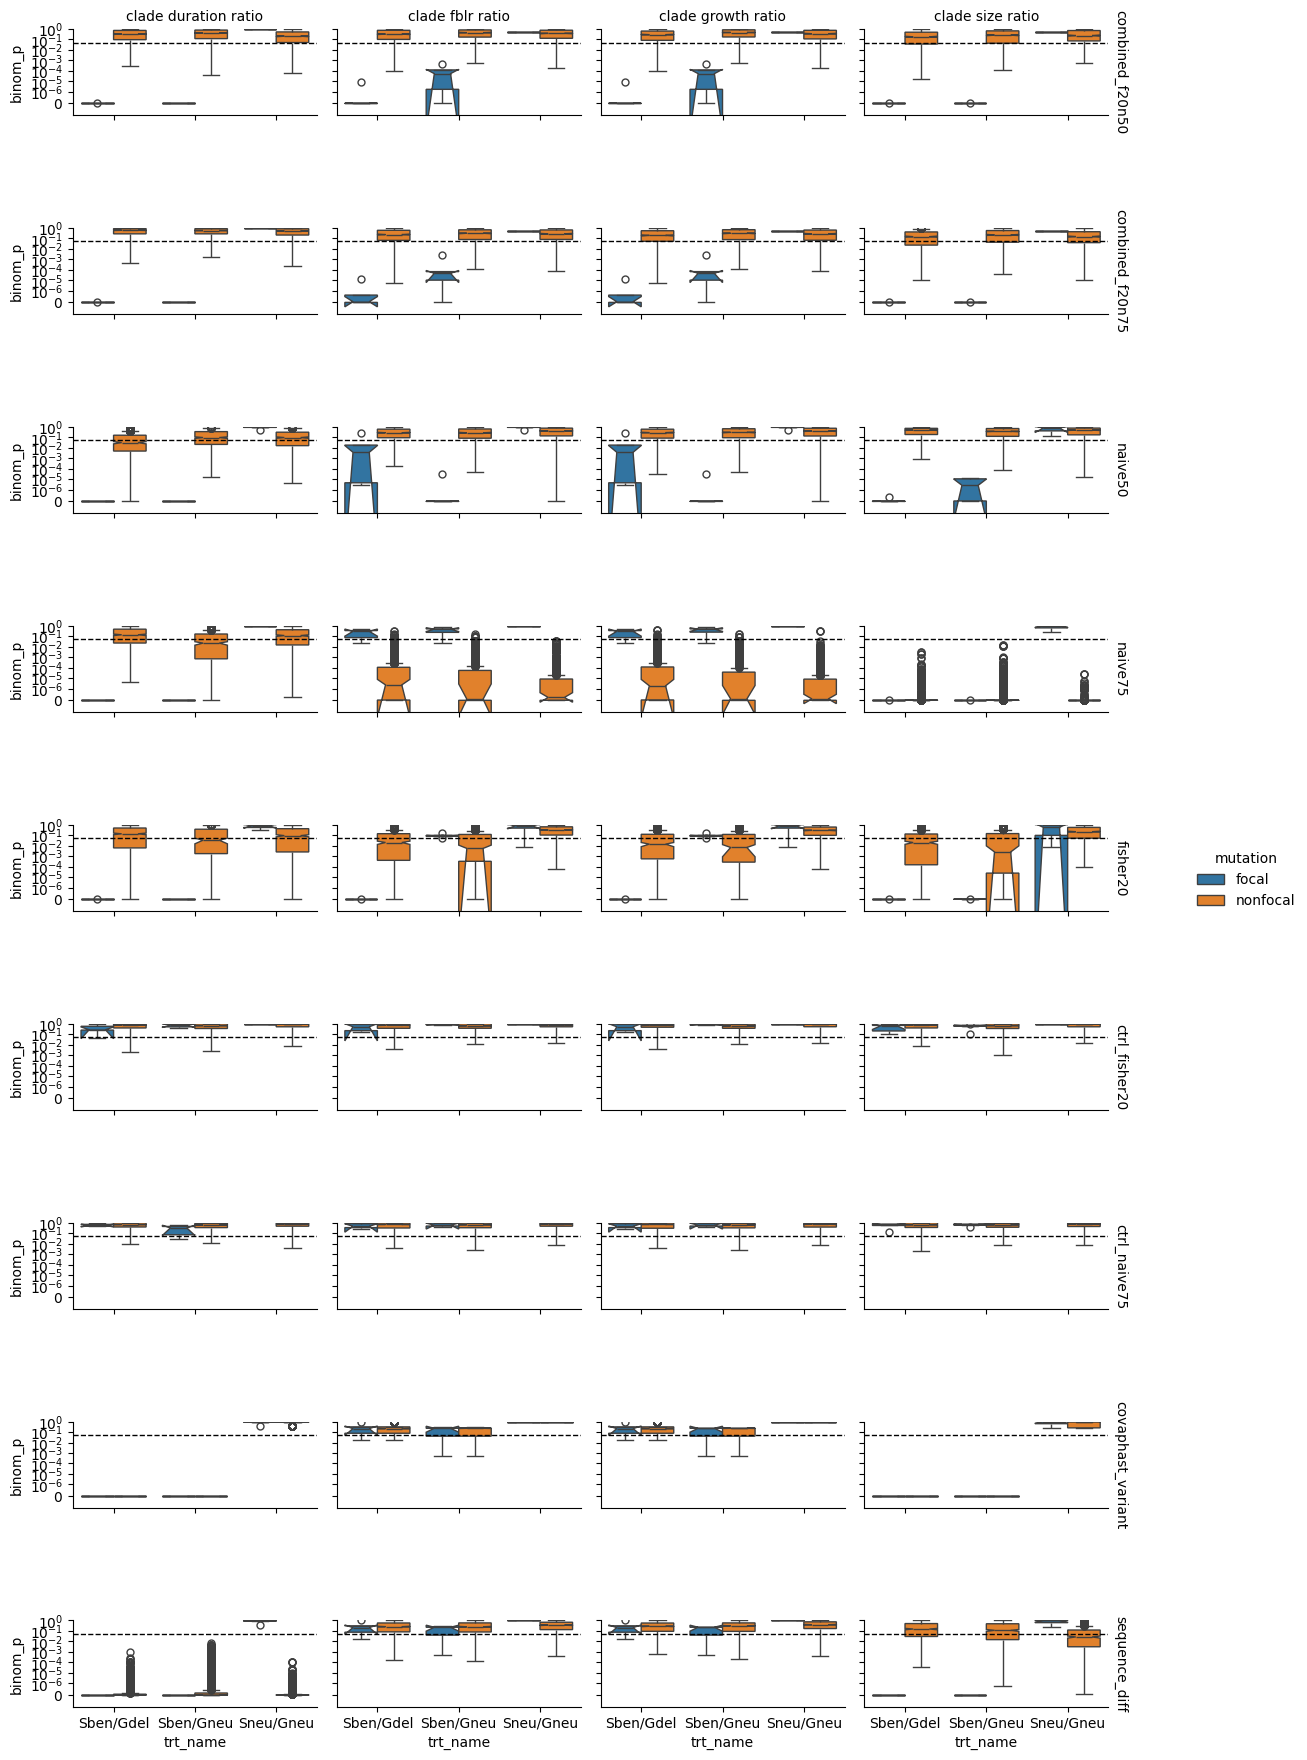

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.png


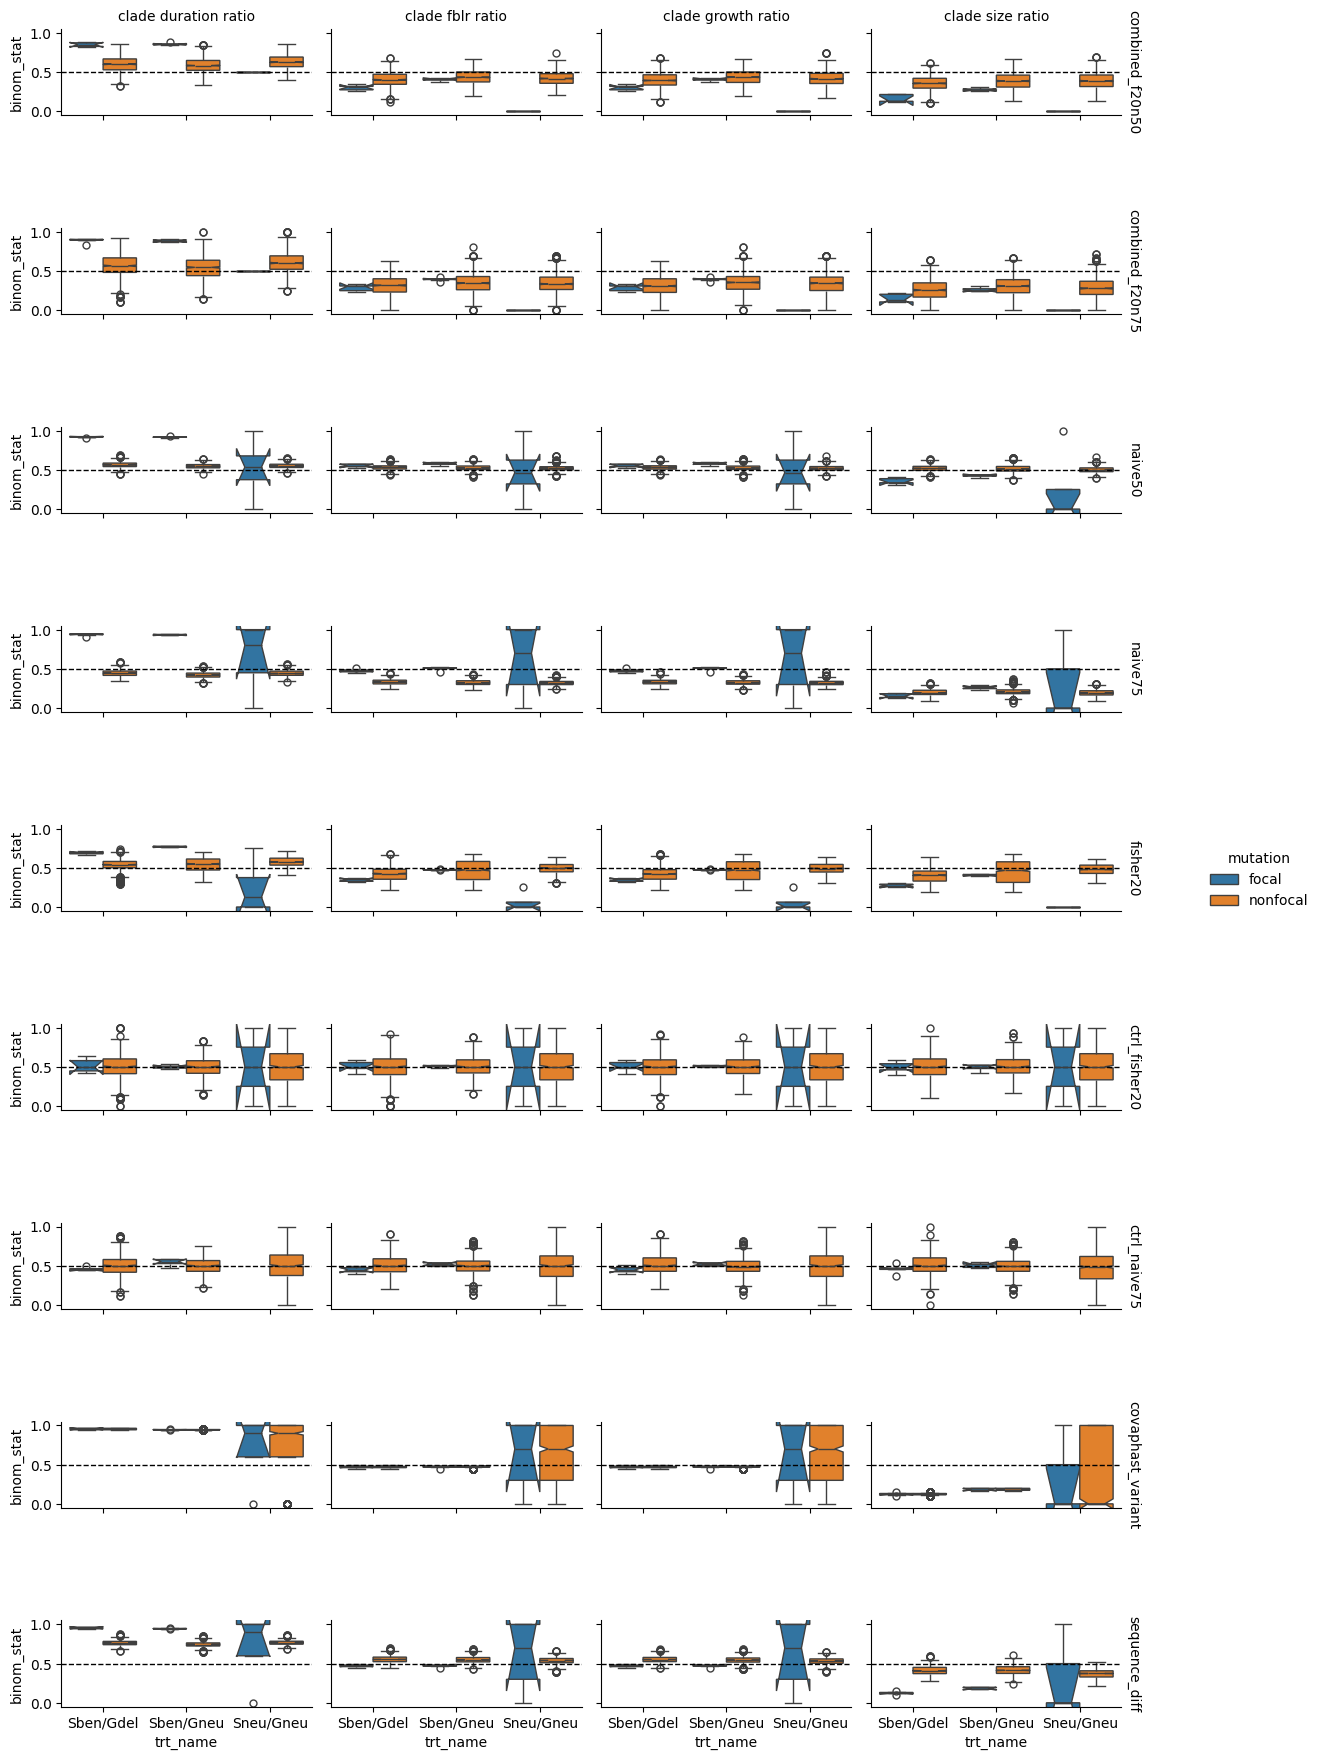

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.png


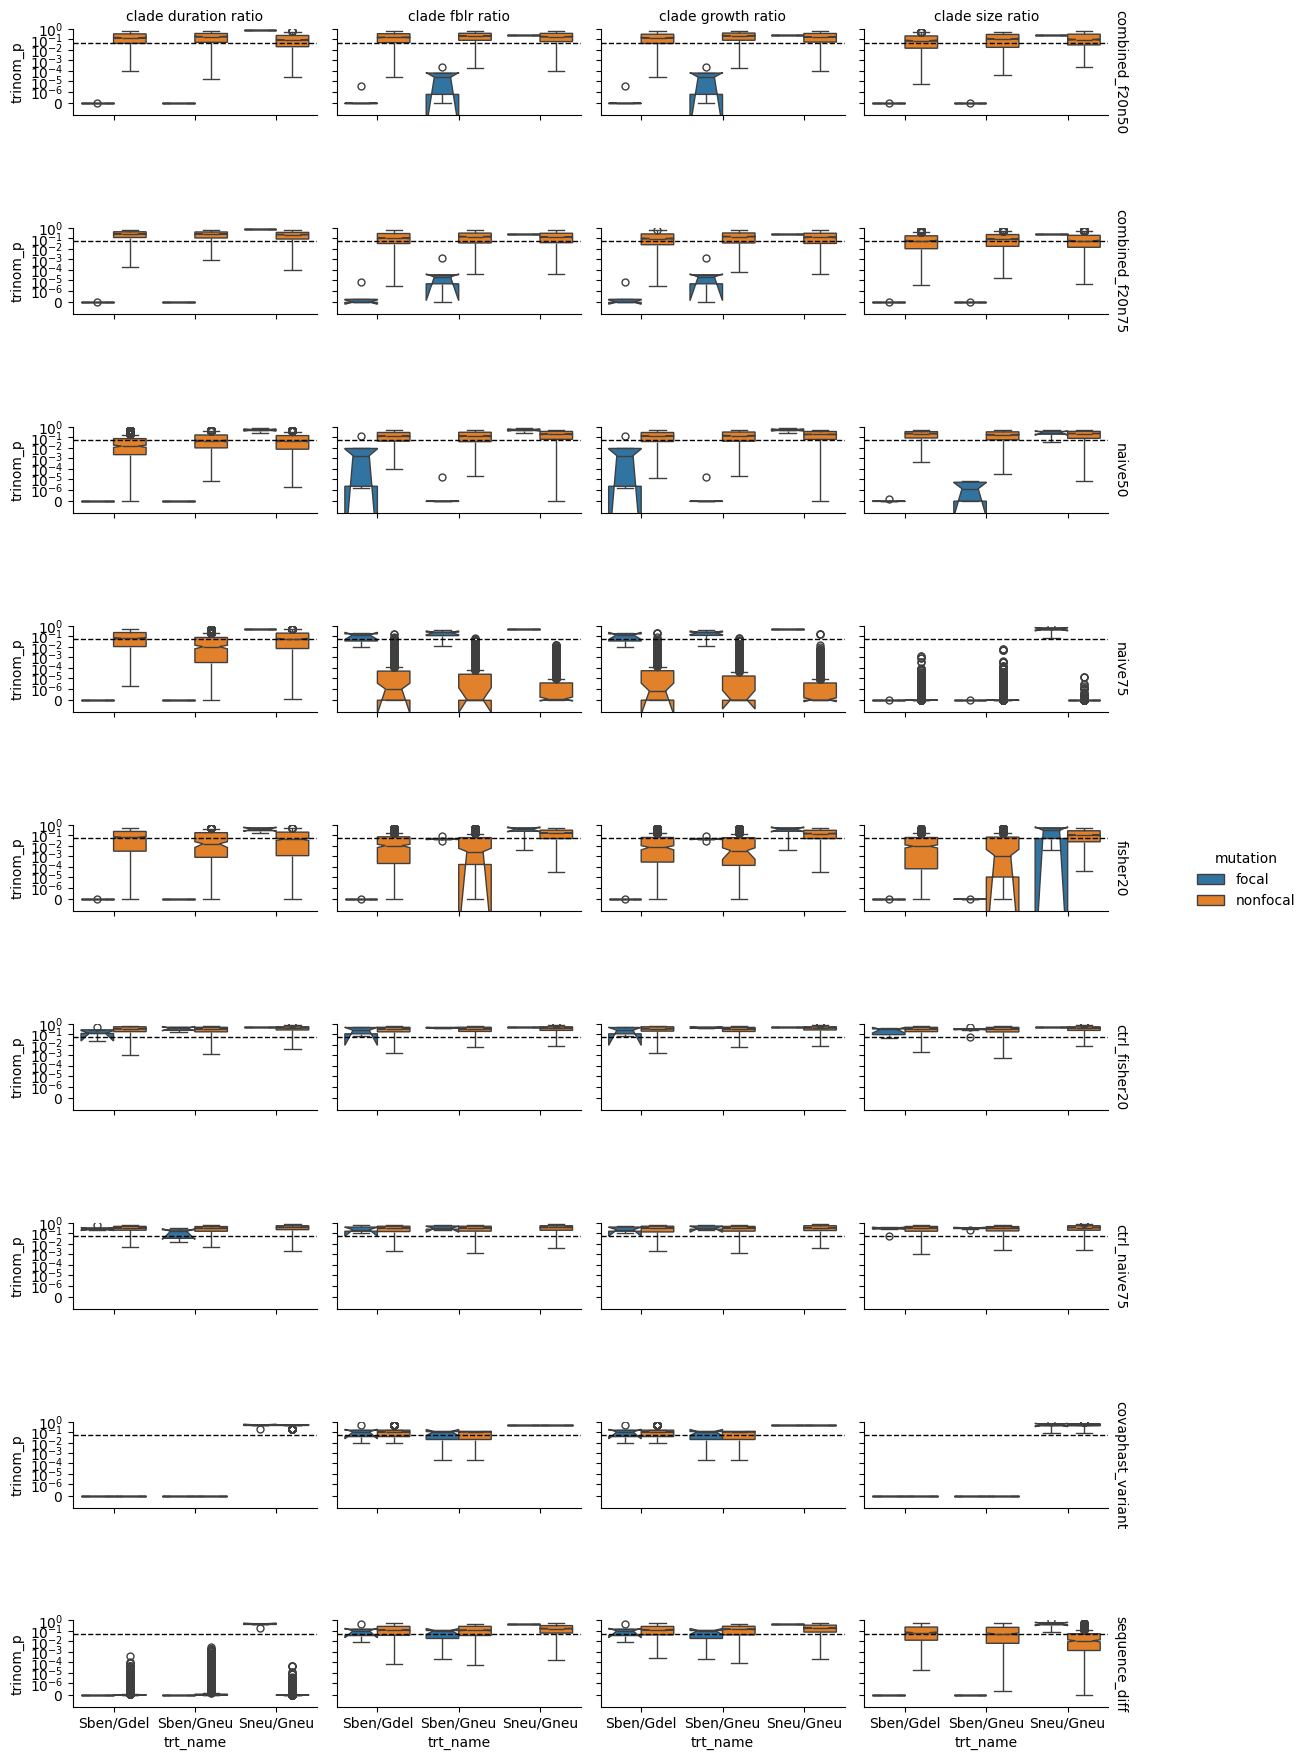

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.png


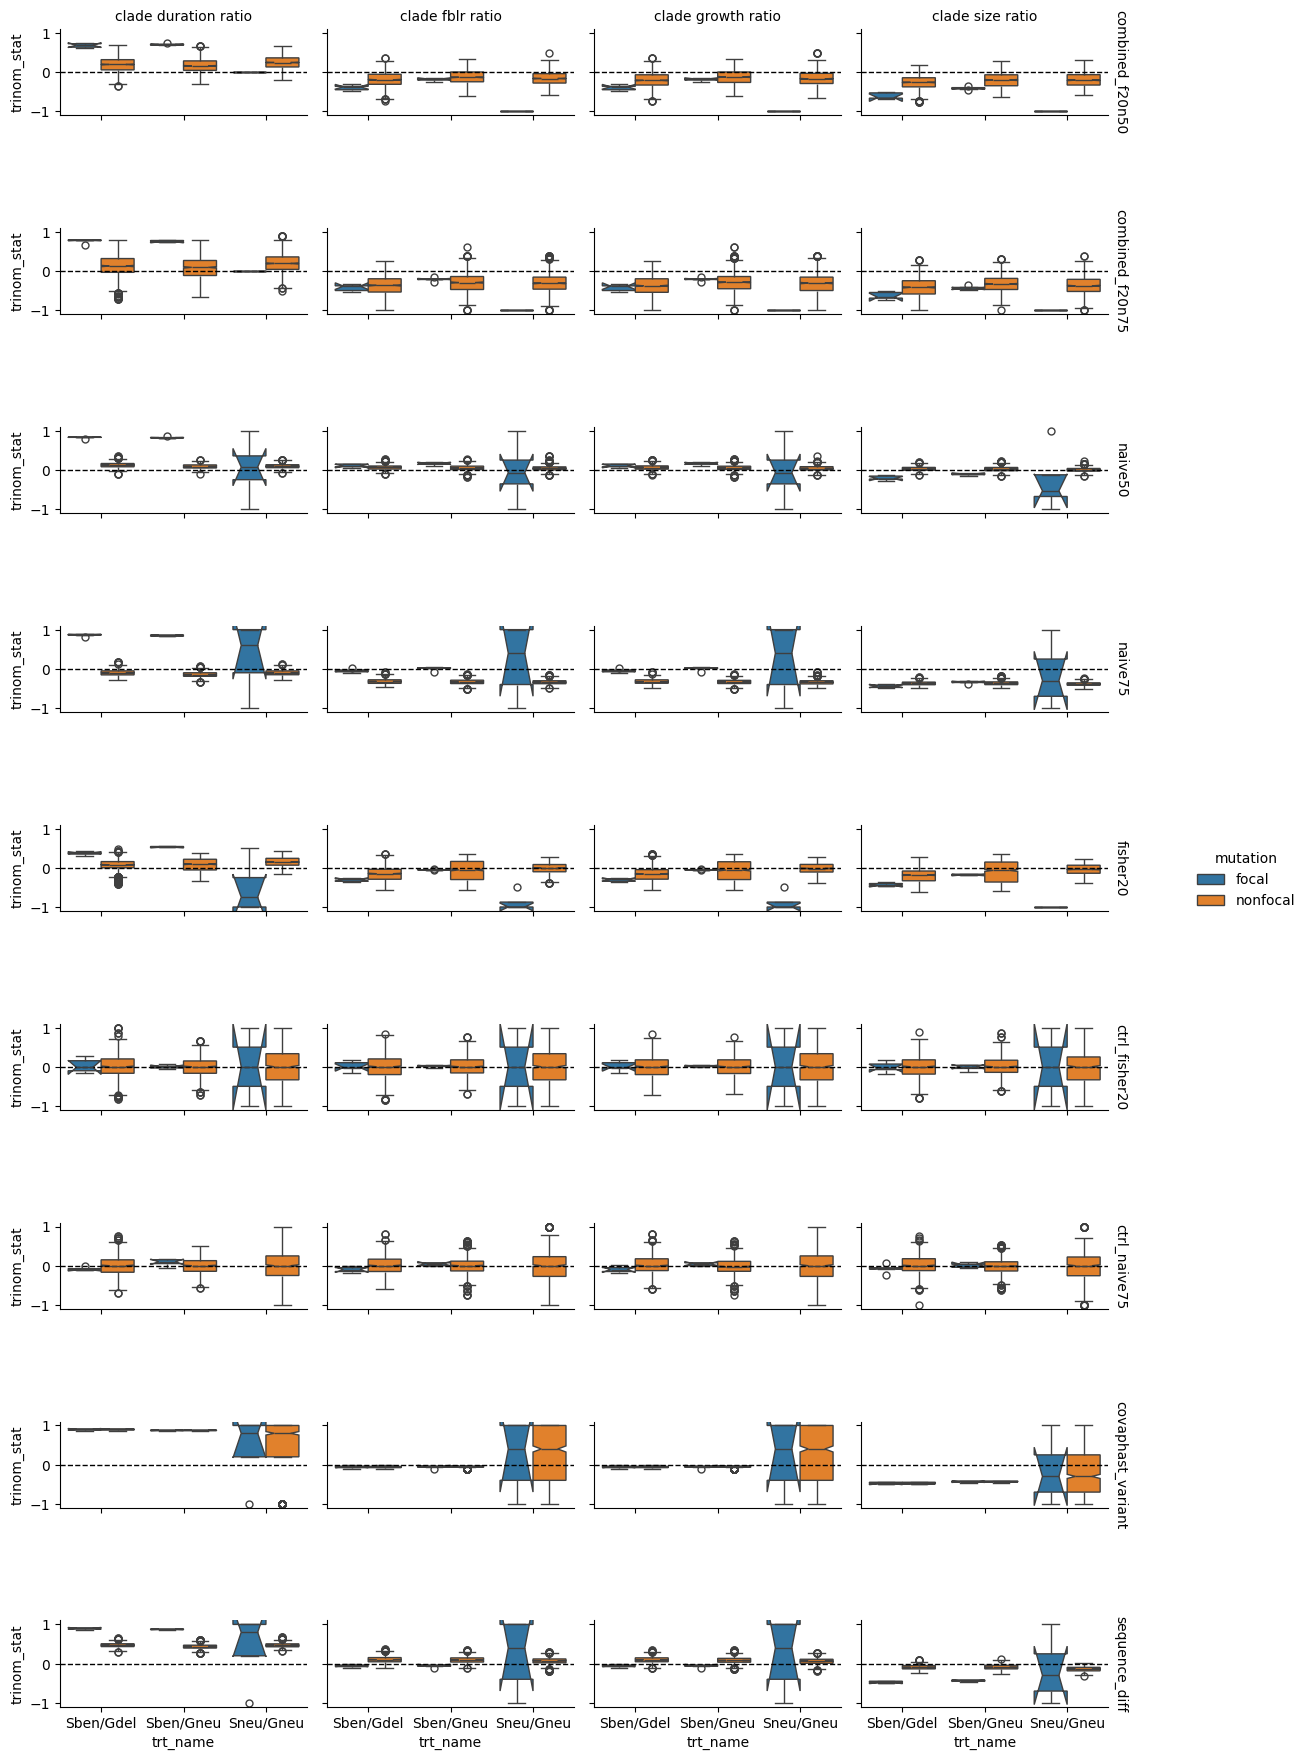

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.png


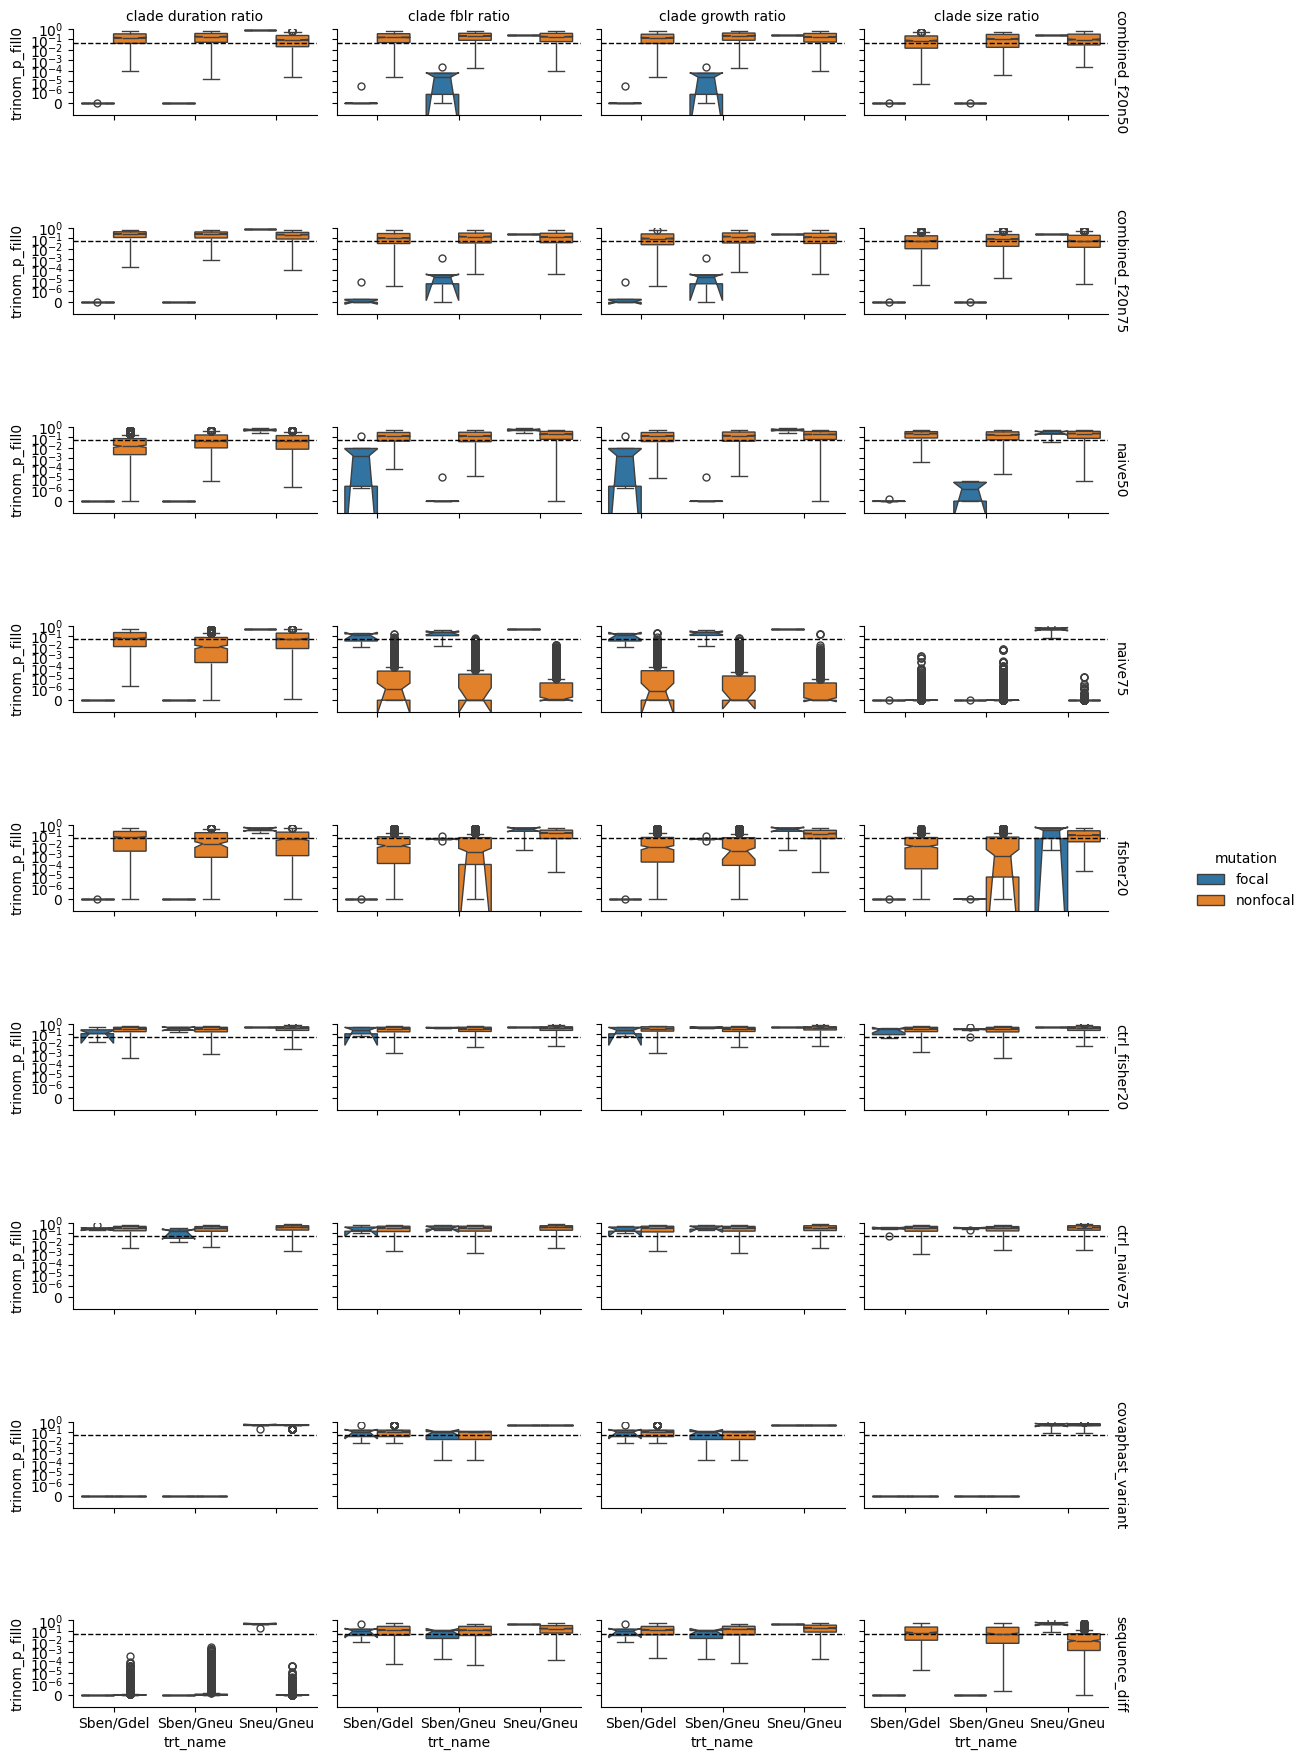

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.png


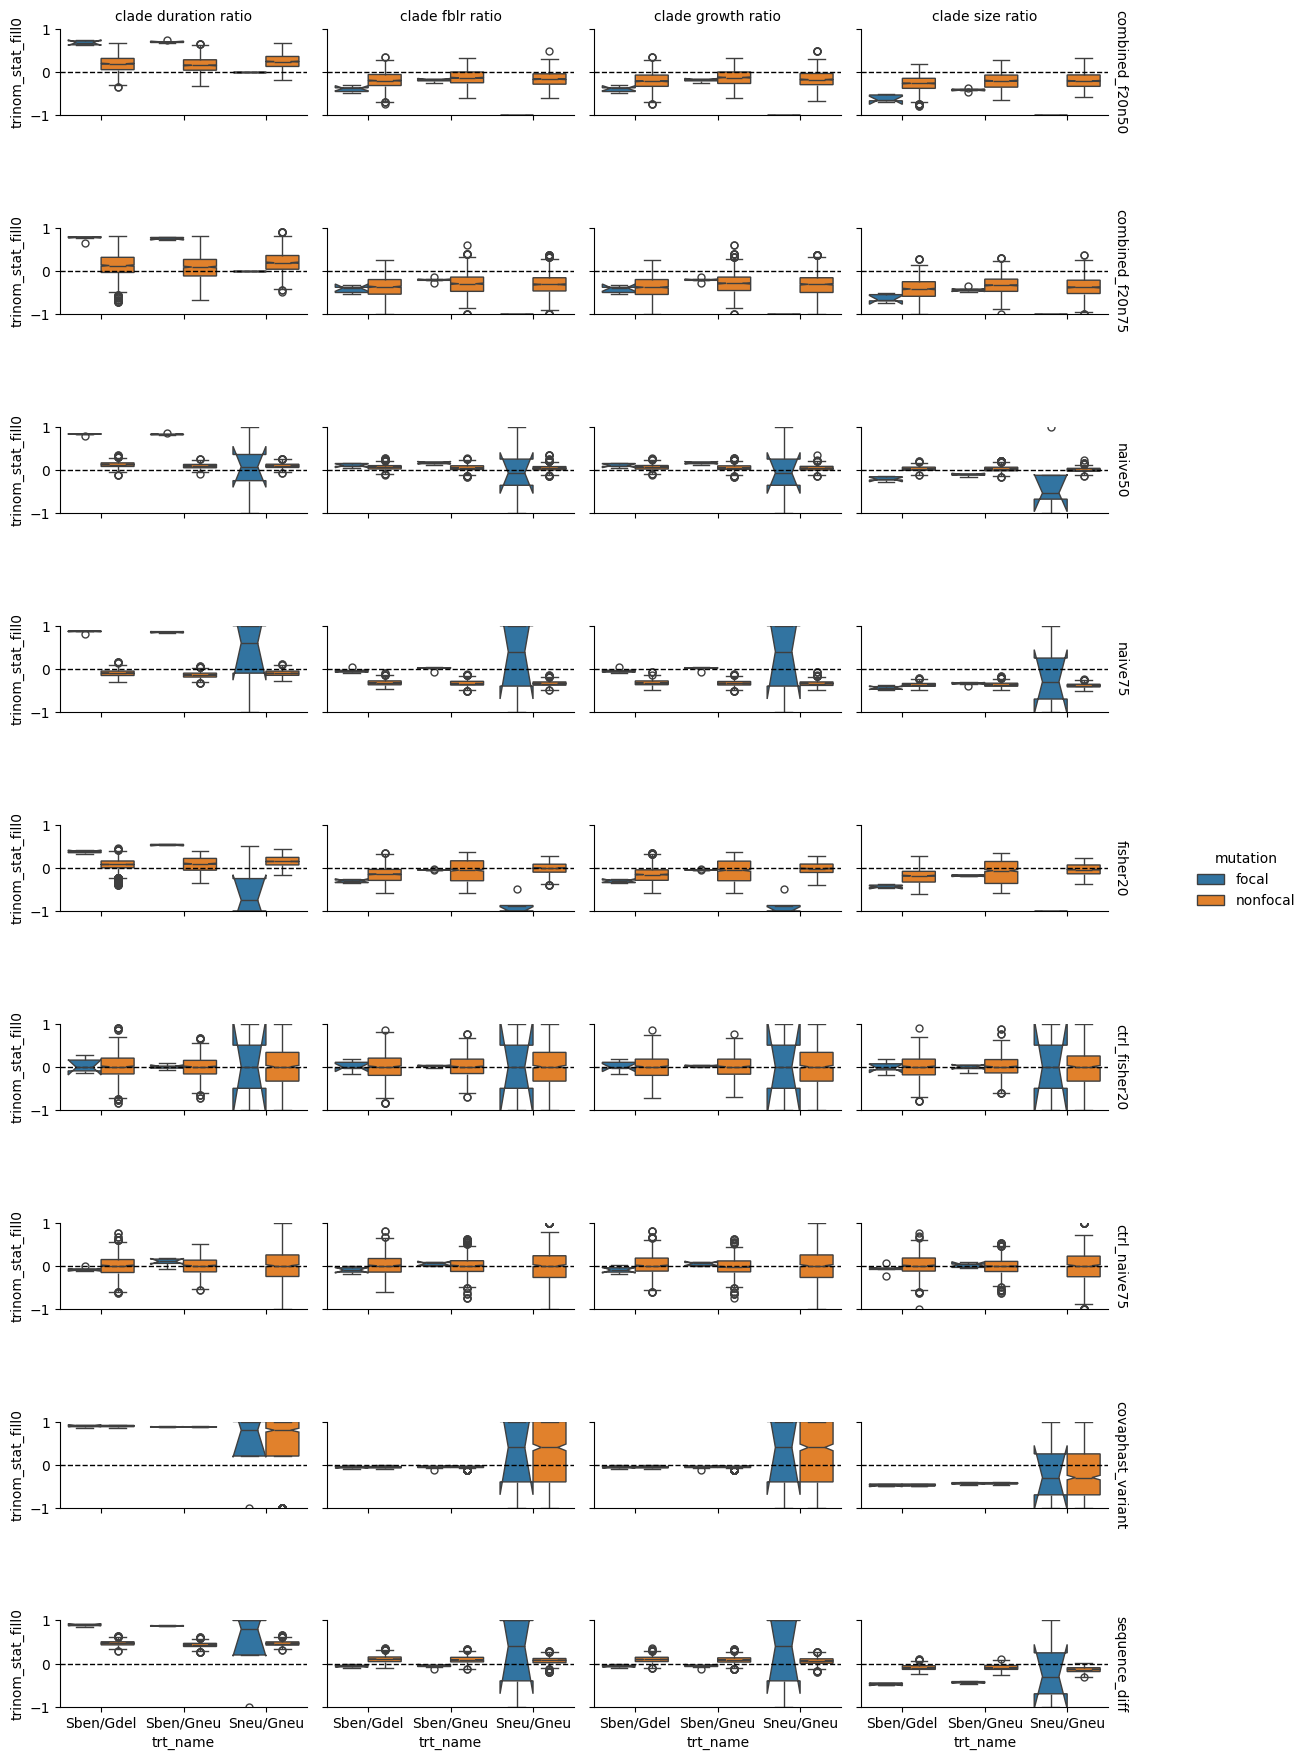

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.png


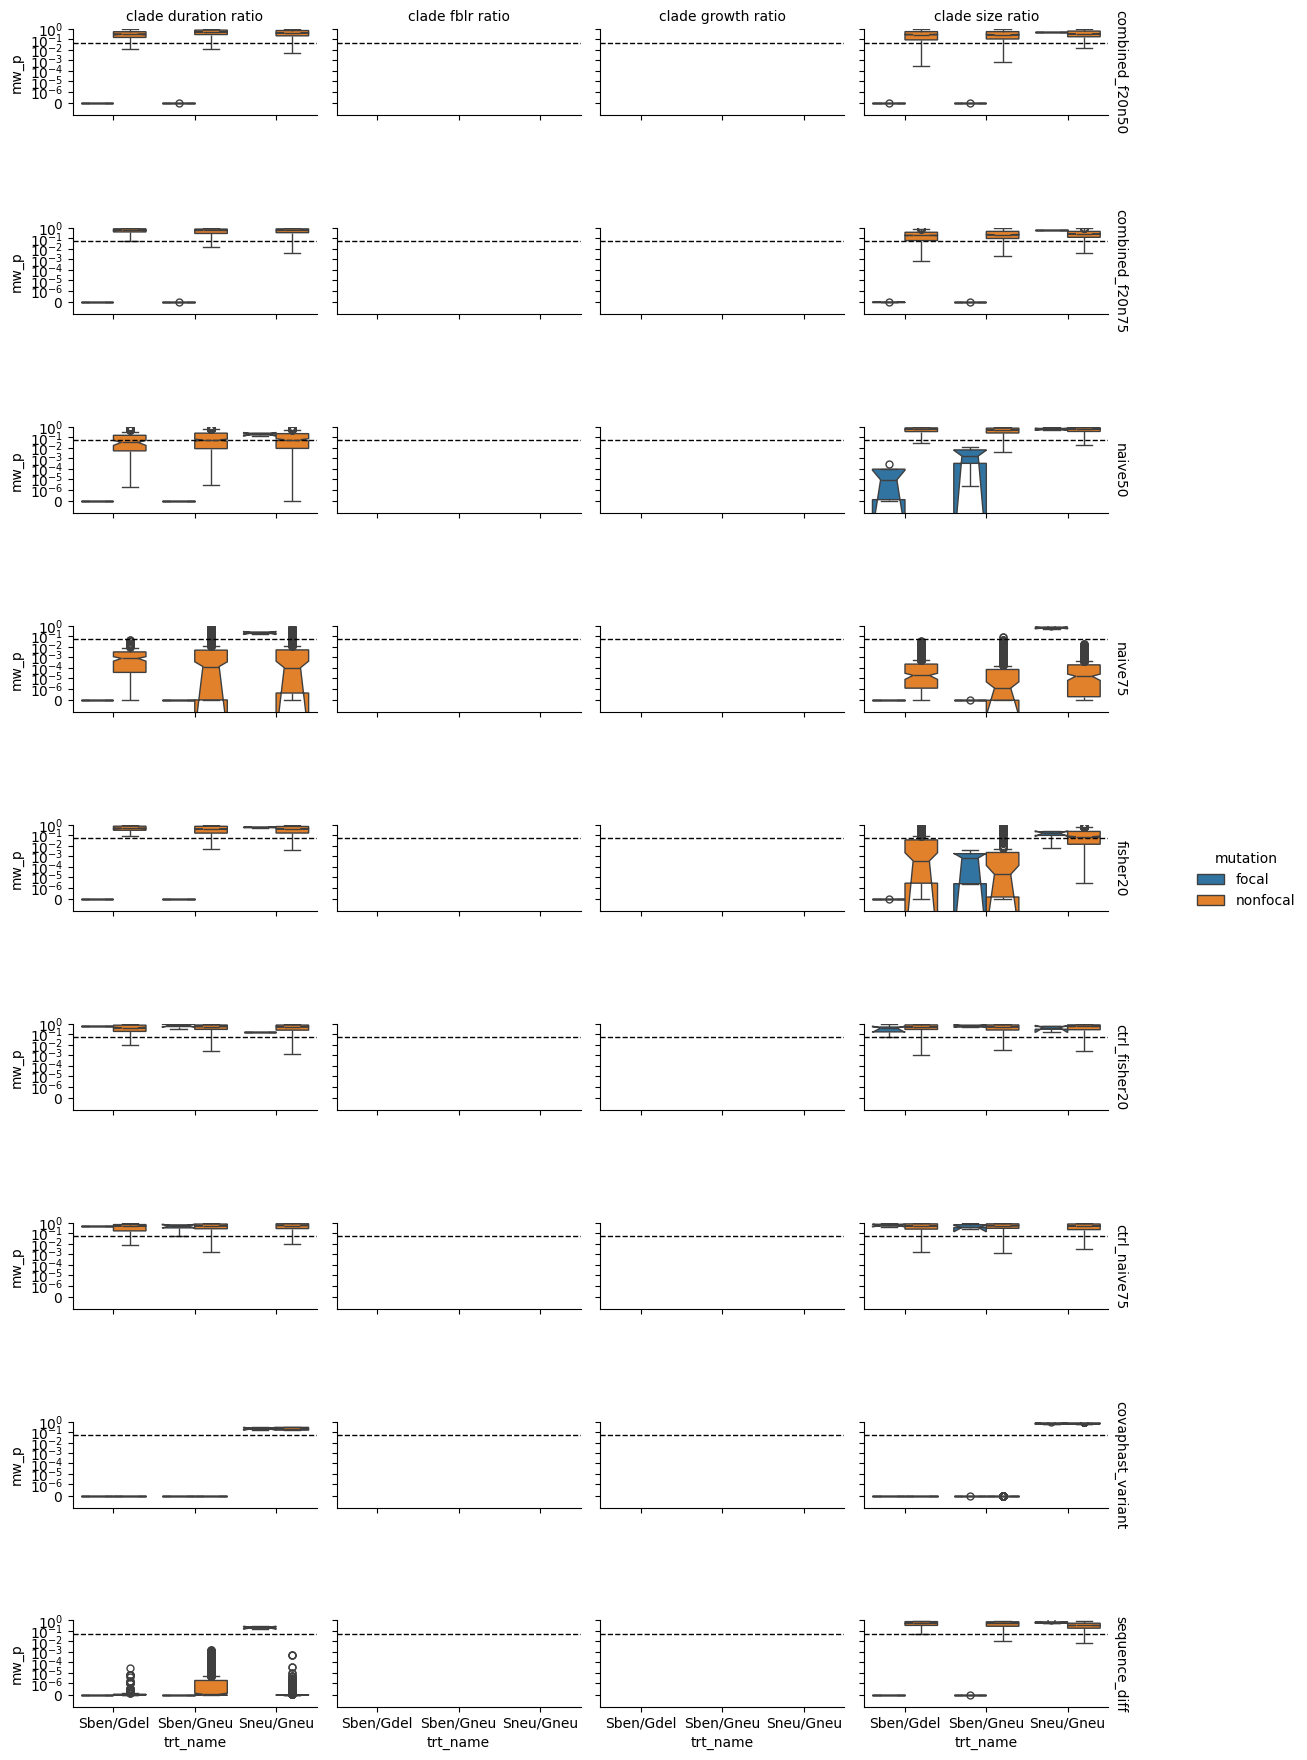

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.png


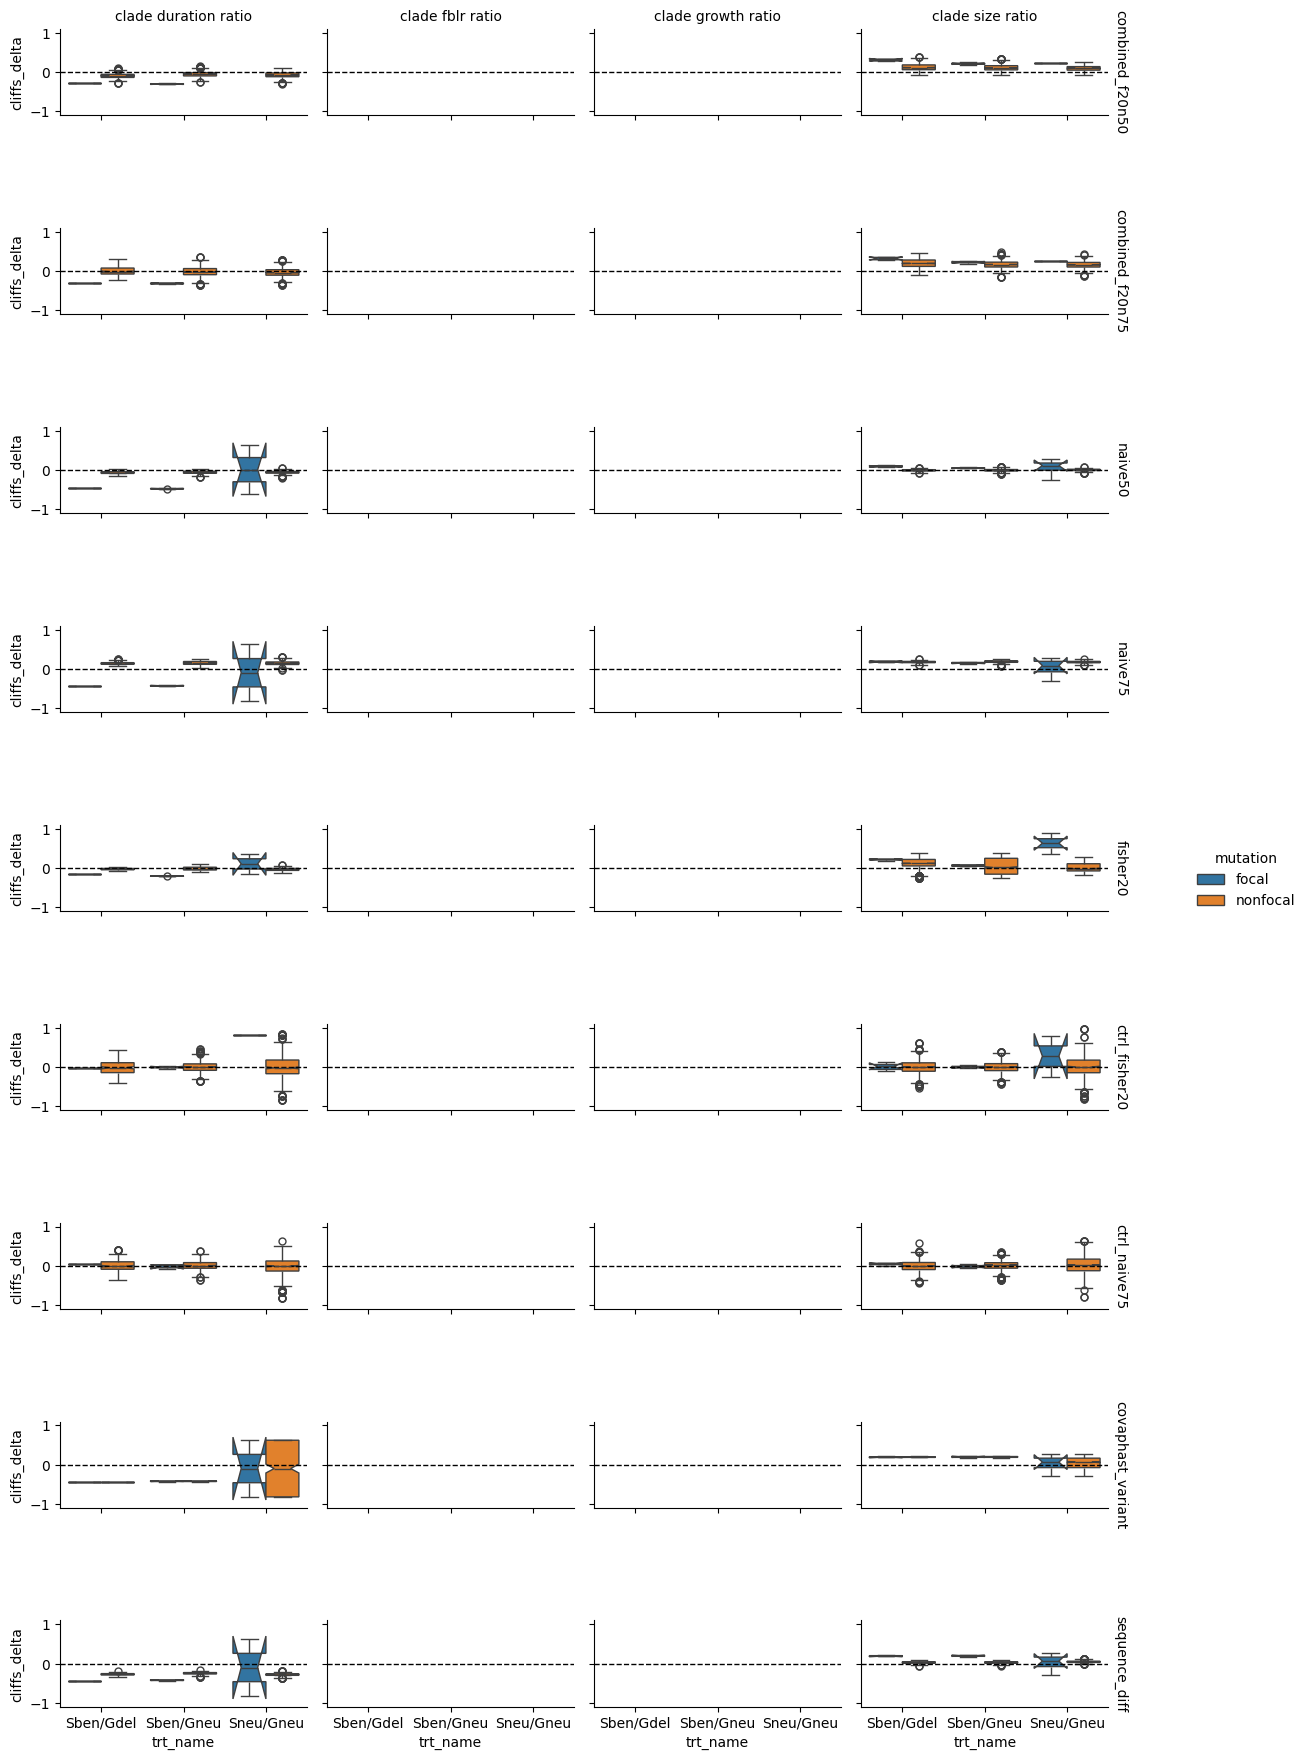

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.png


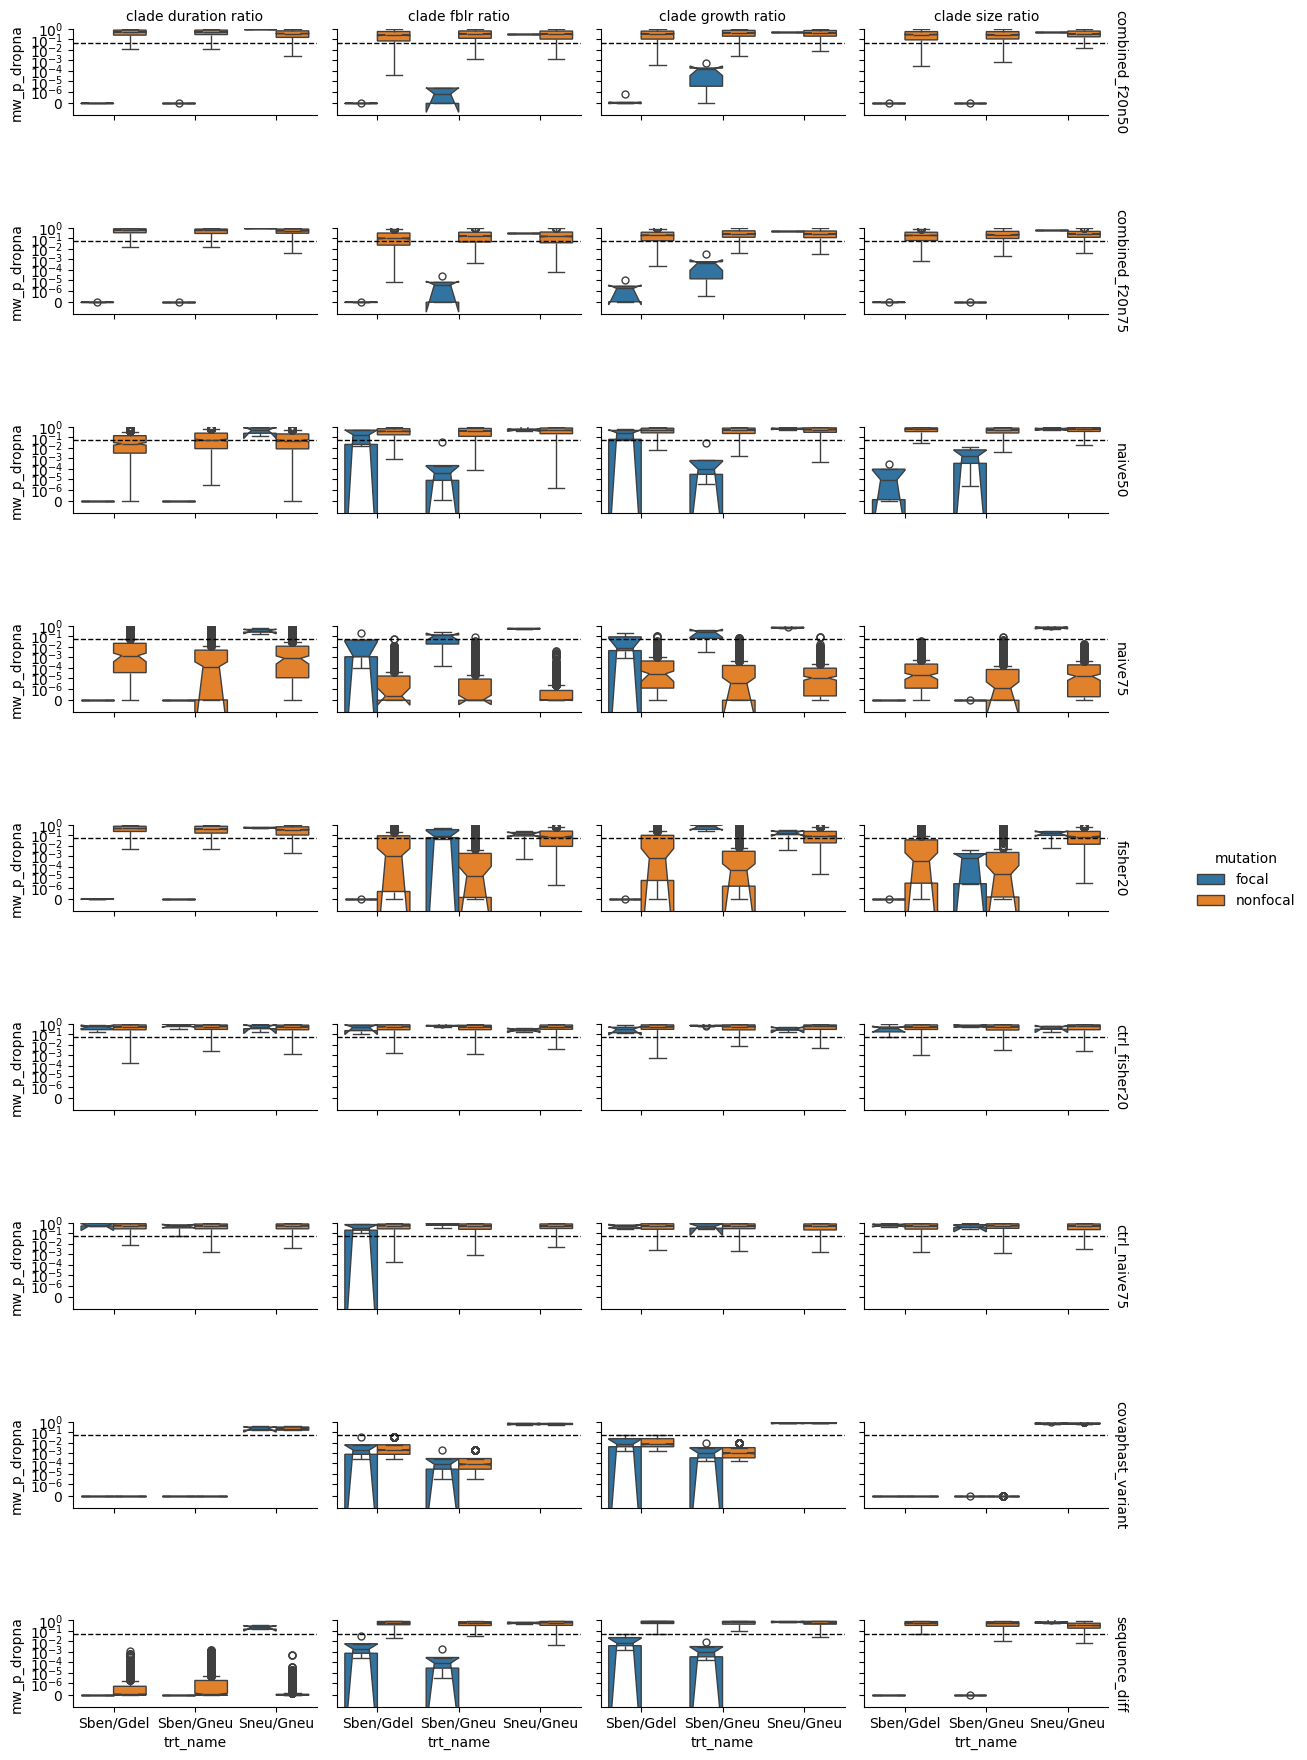

teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.pdf
teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.png


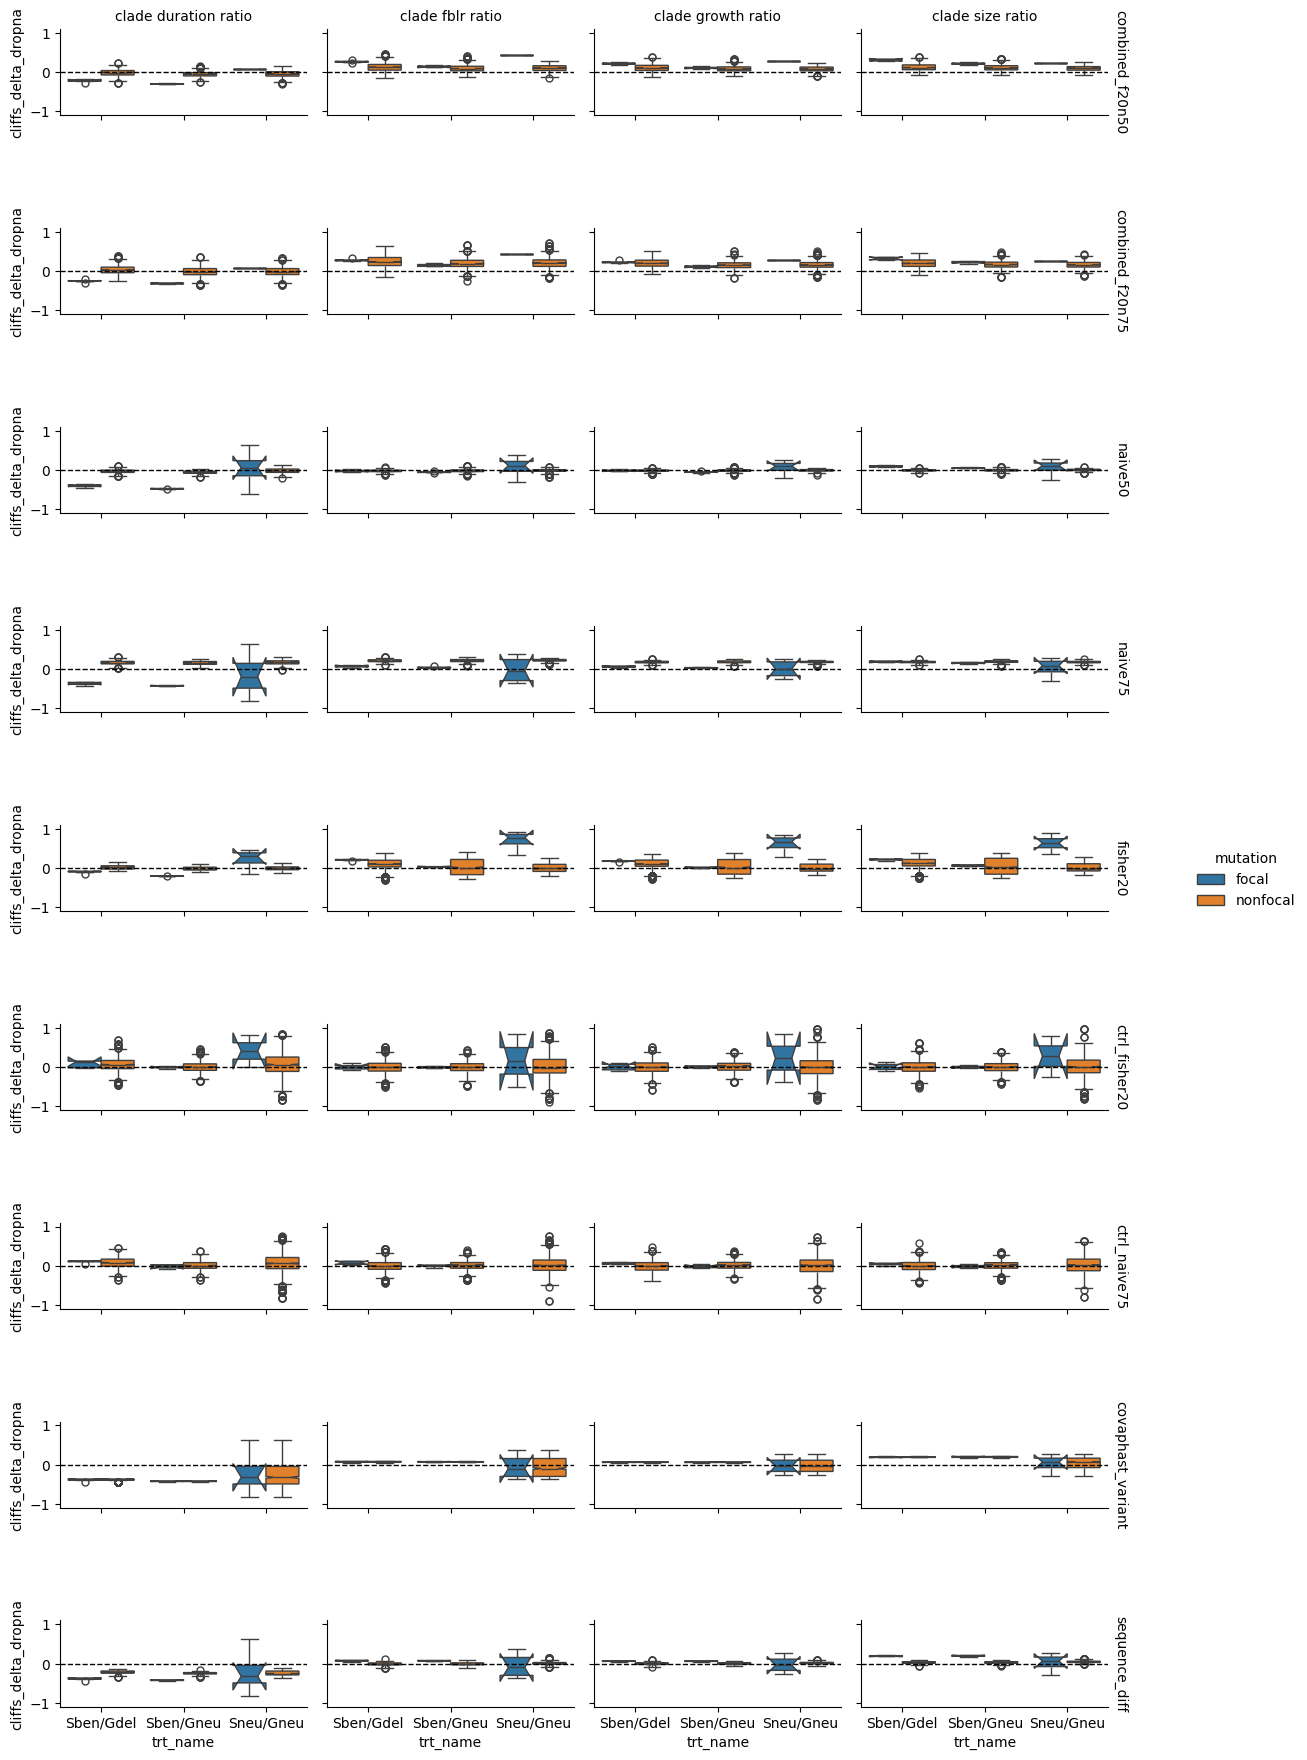

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-p+ext=.png


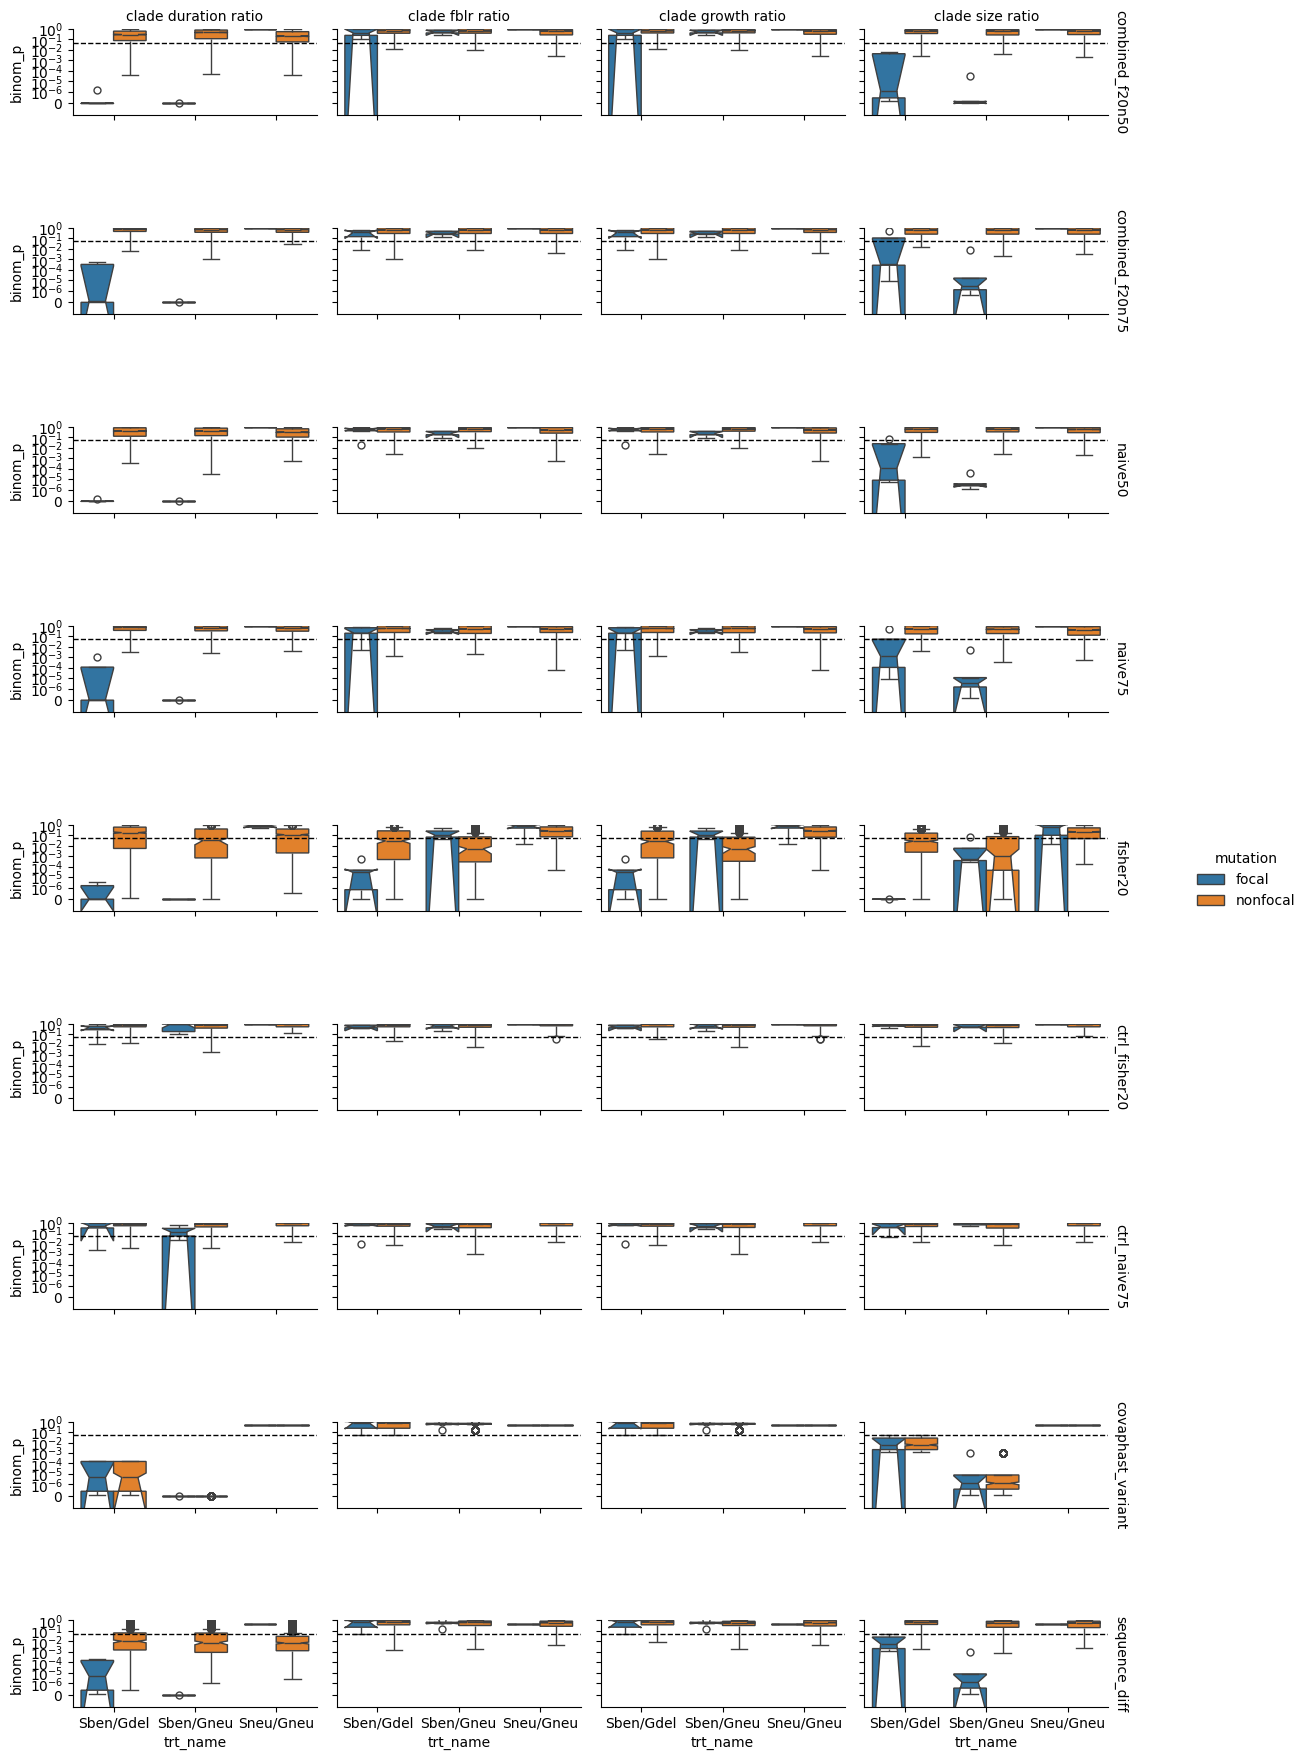

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=binom-stat+ext=.png


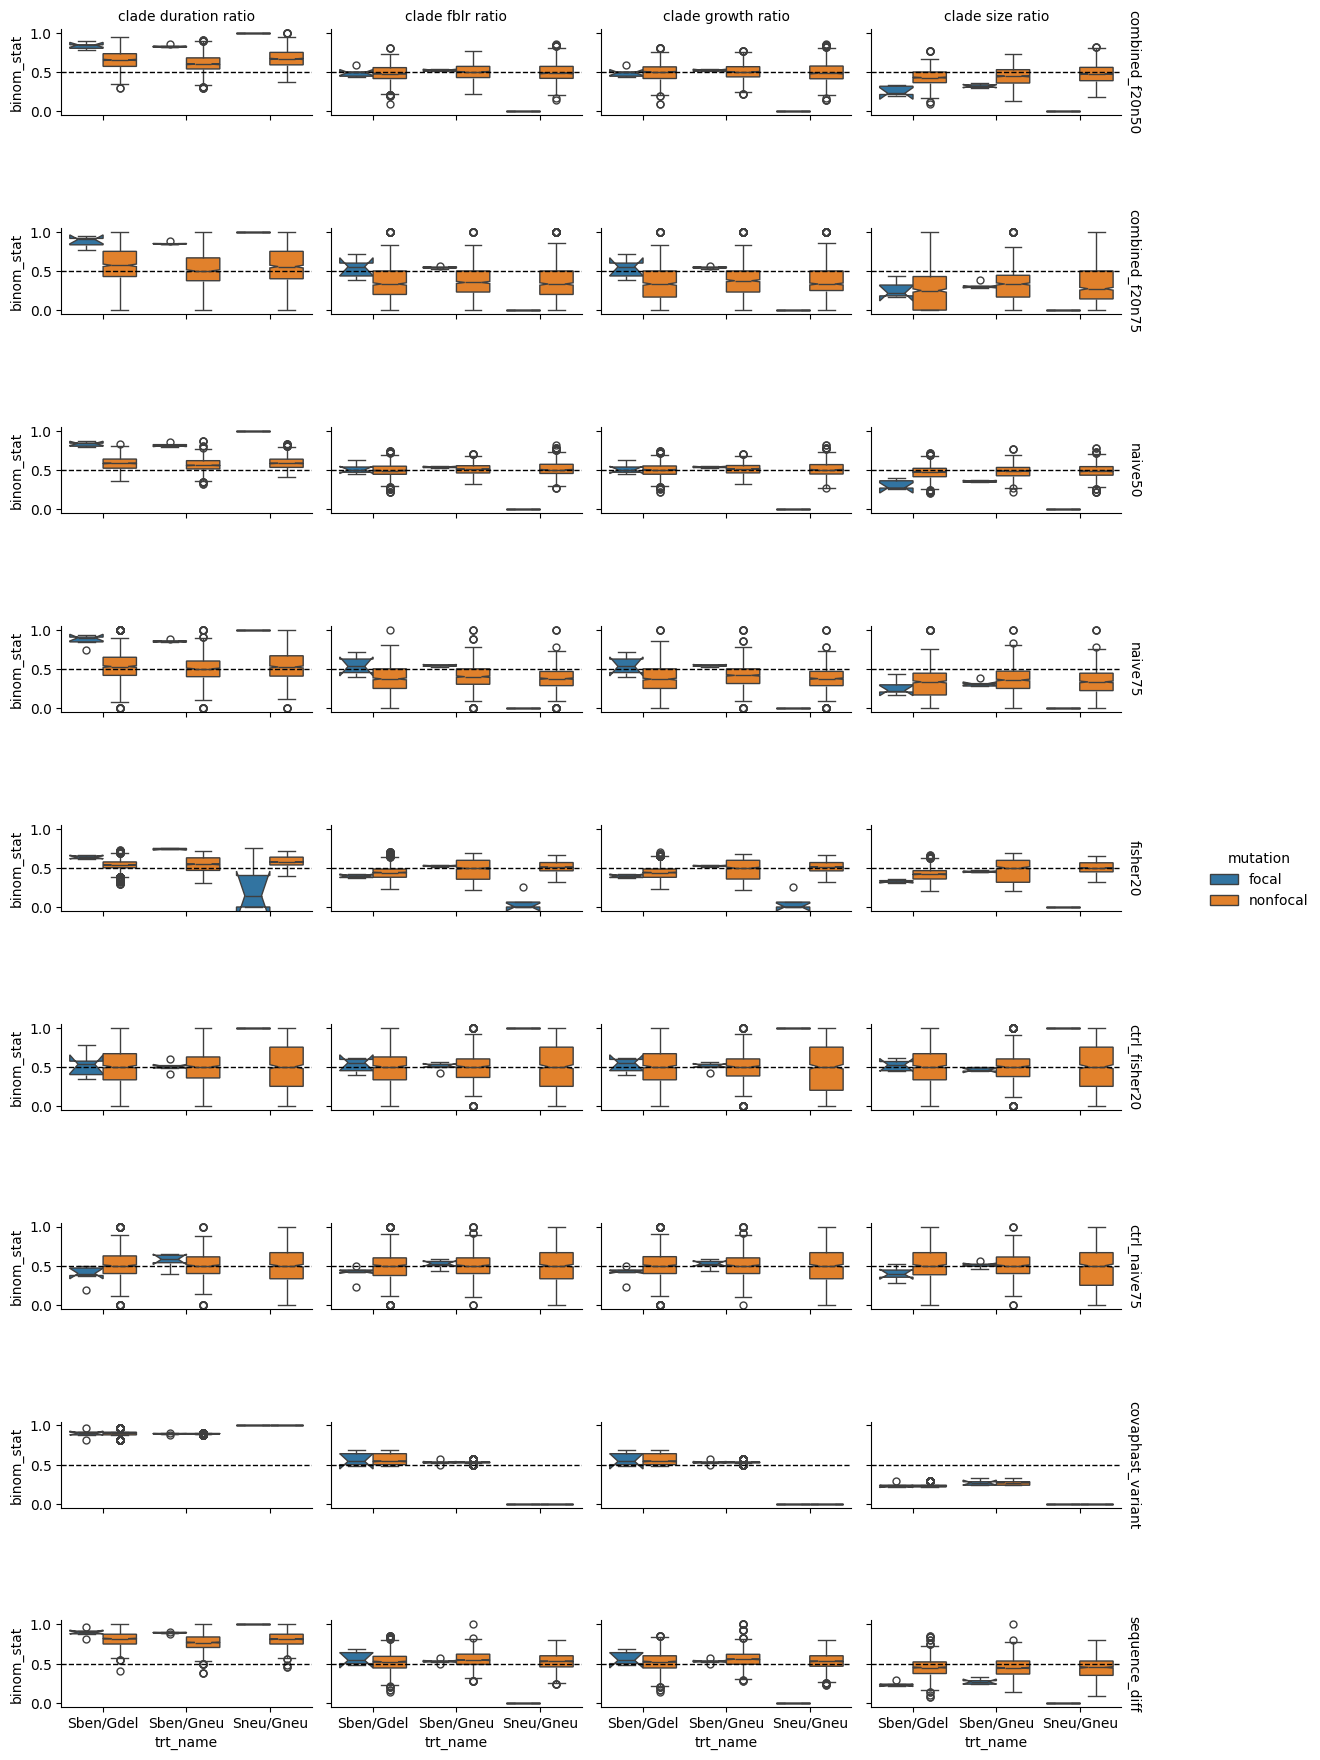

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p+ext=.png


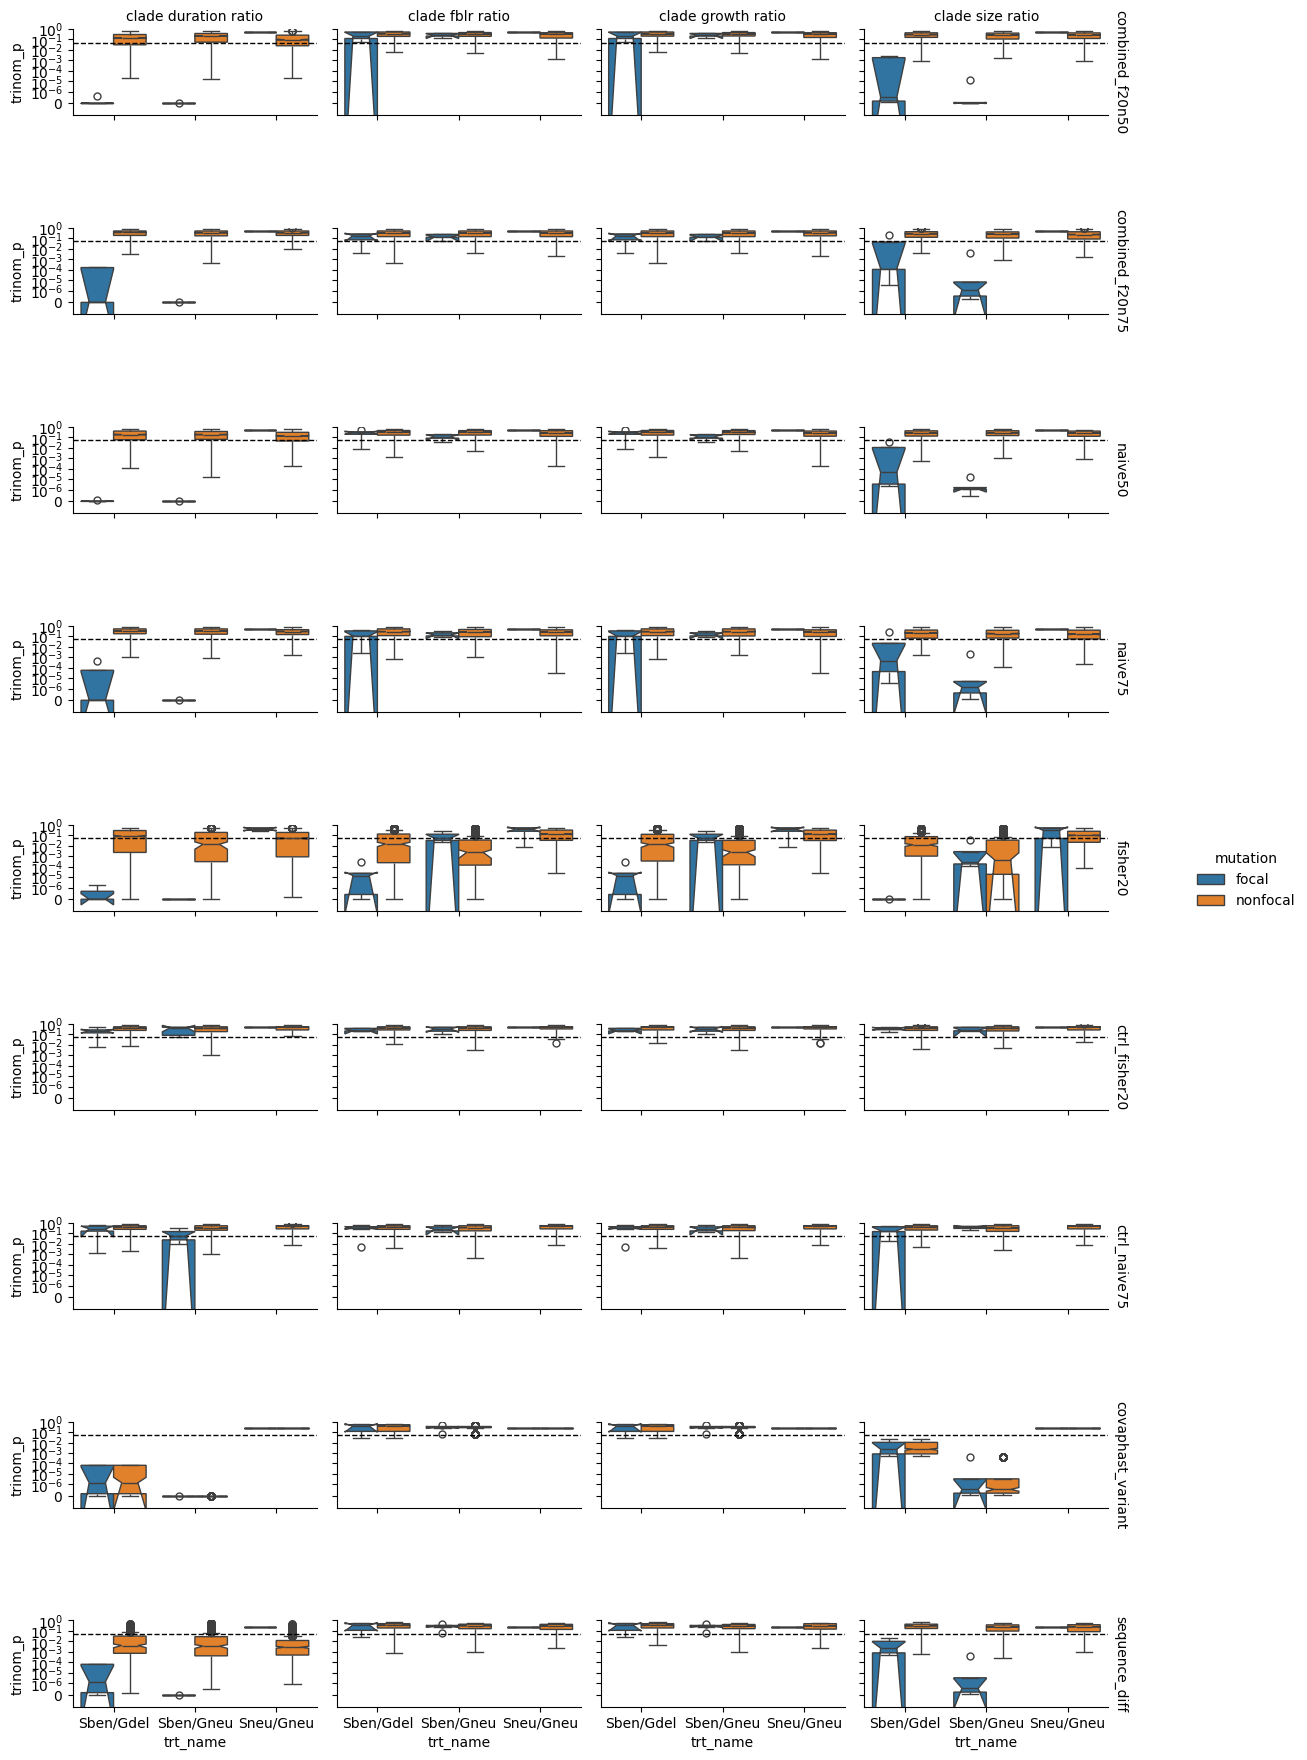

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat+ext=.png


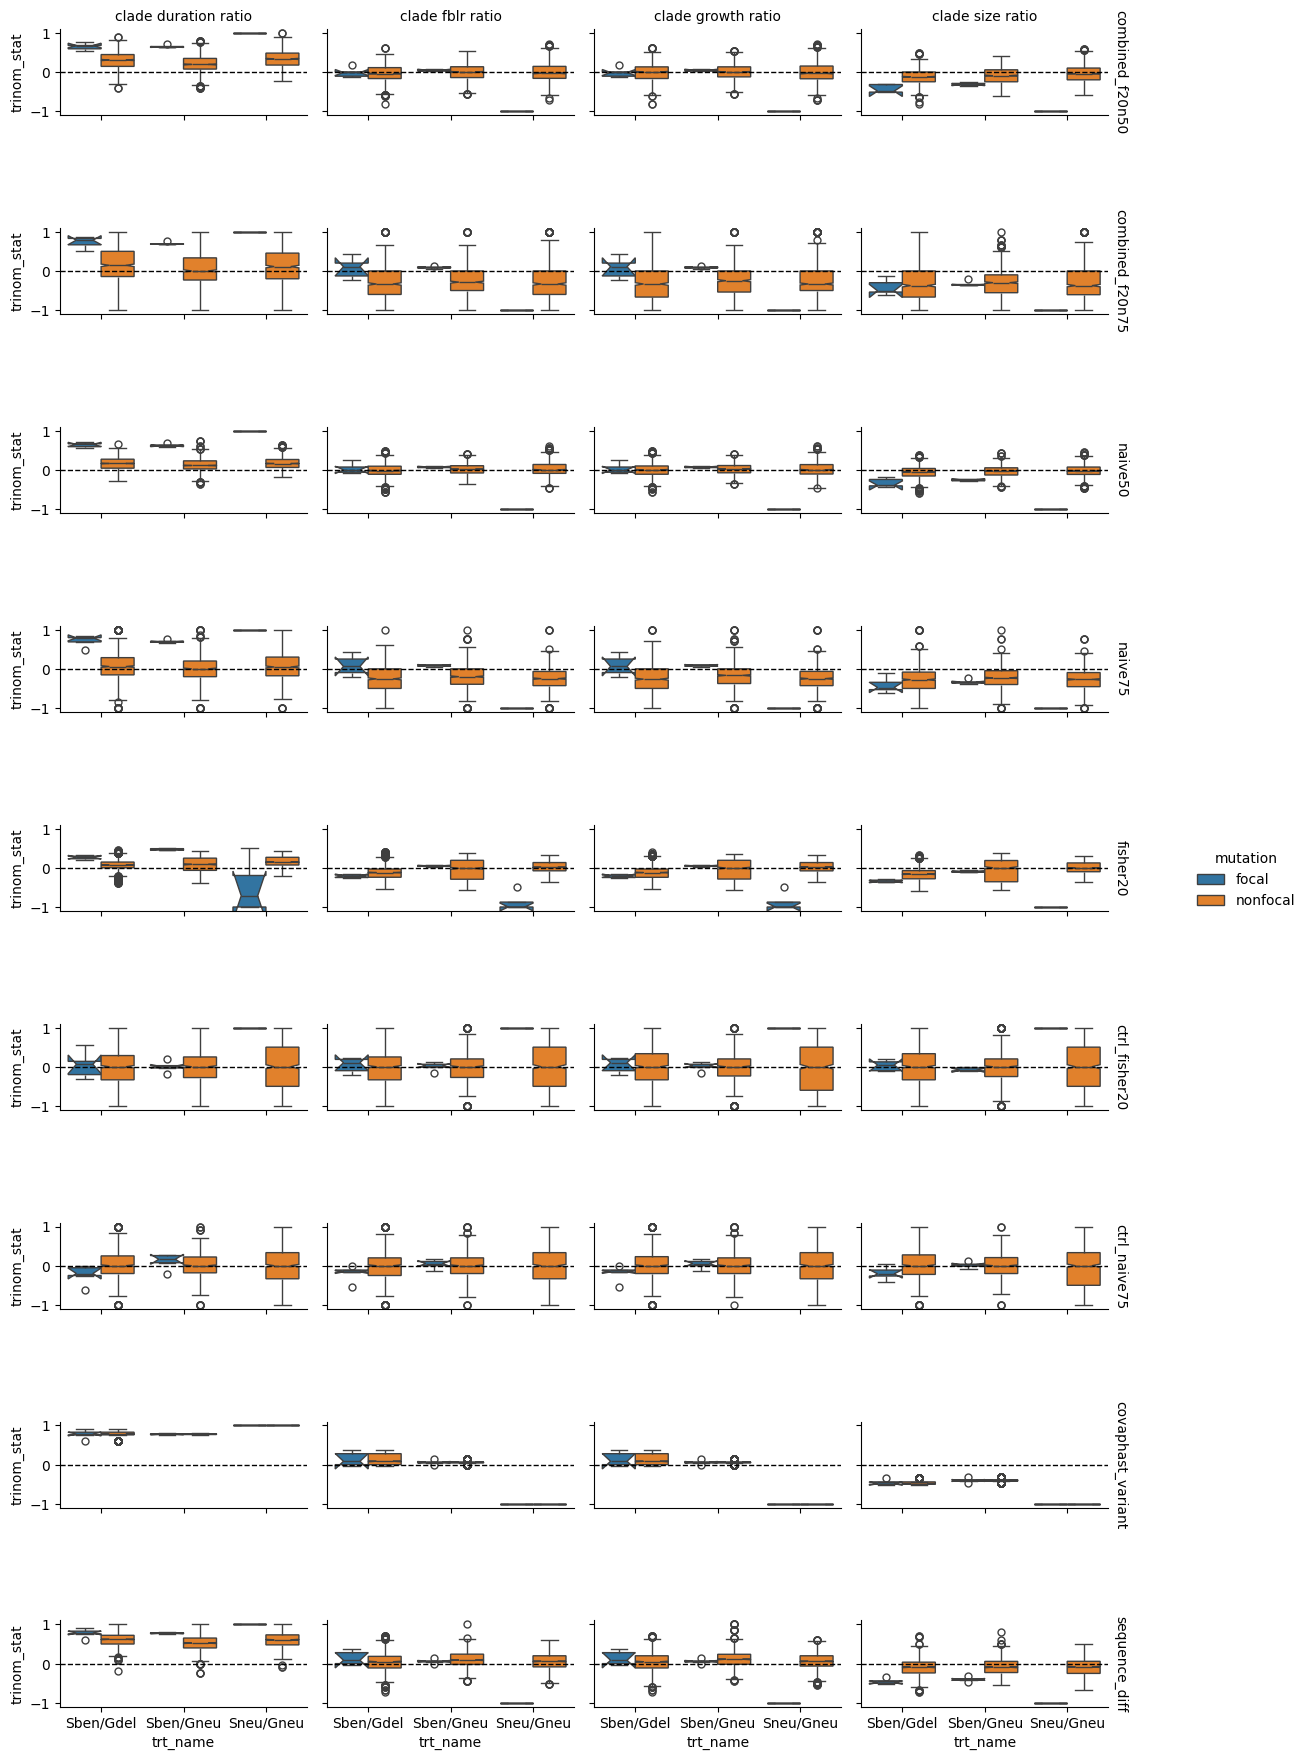

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-p-fill0+ext=.png


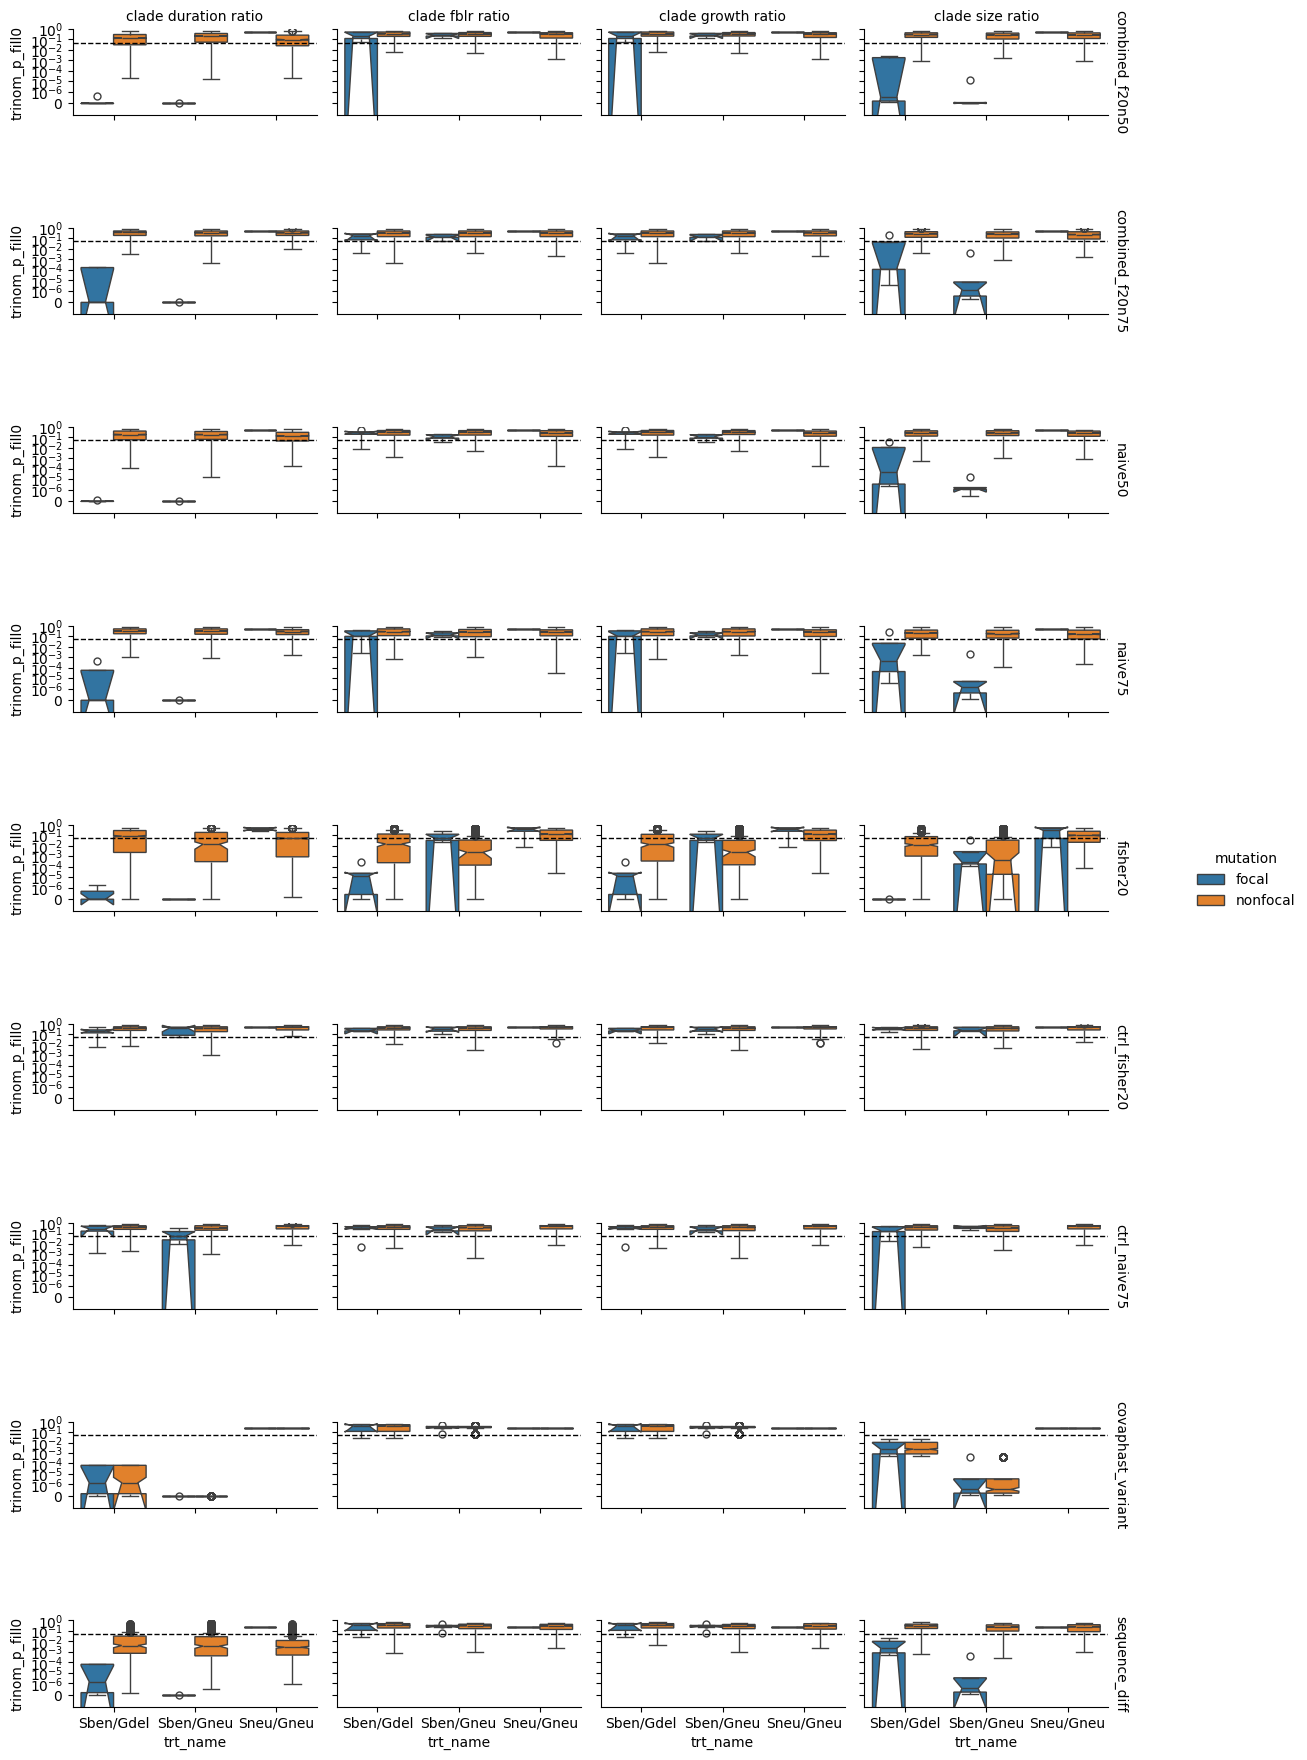

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=trinom-stat-fill0+ext=.png


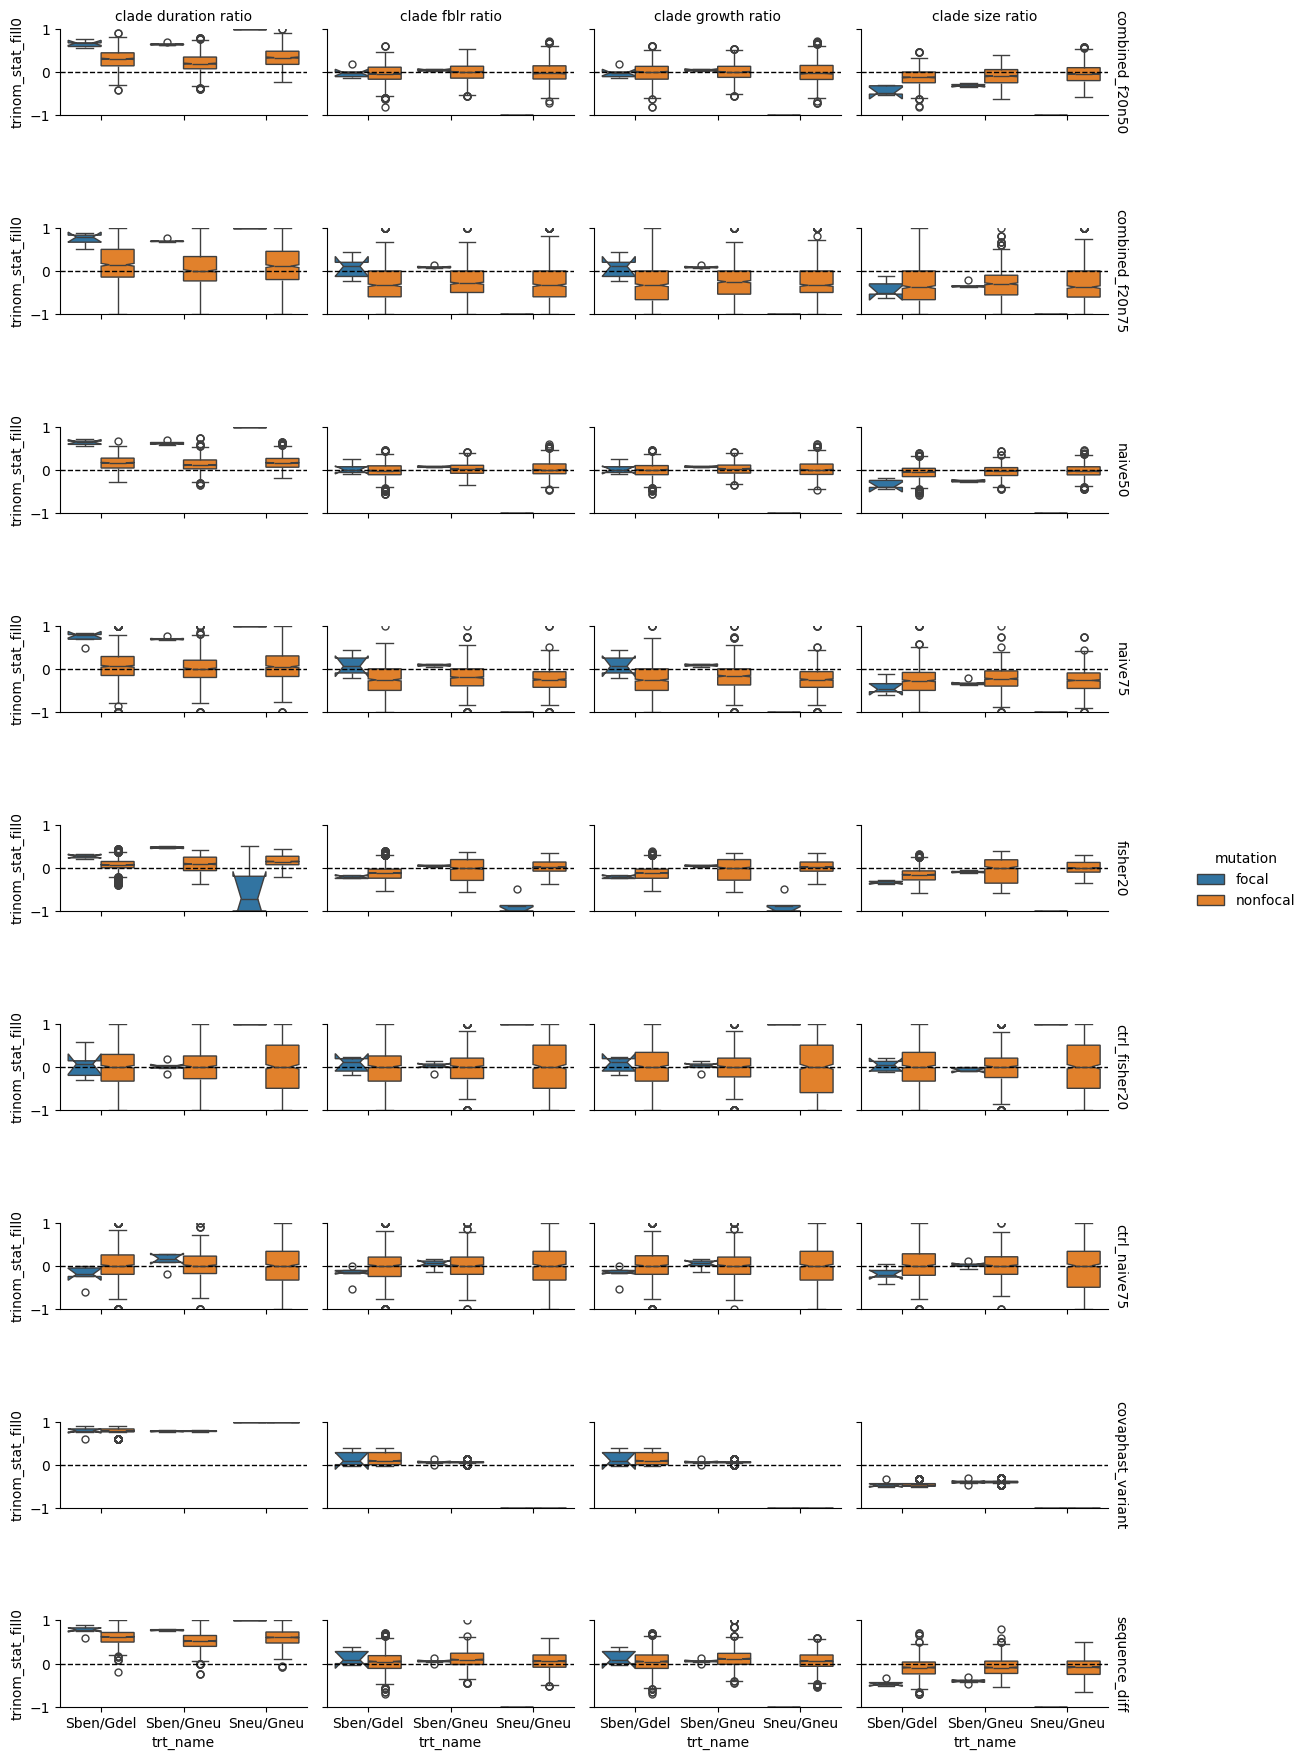

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p+ext=.png


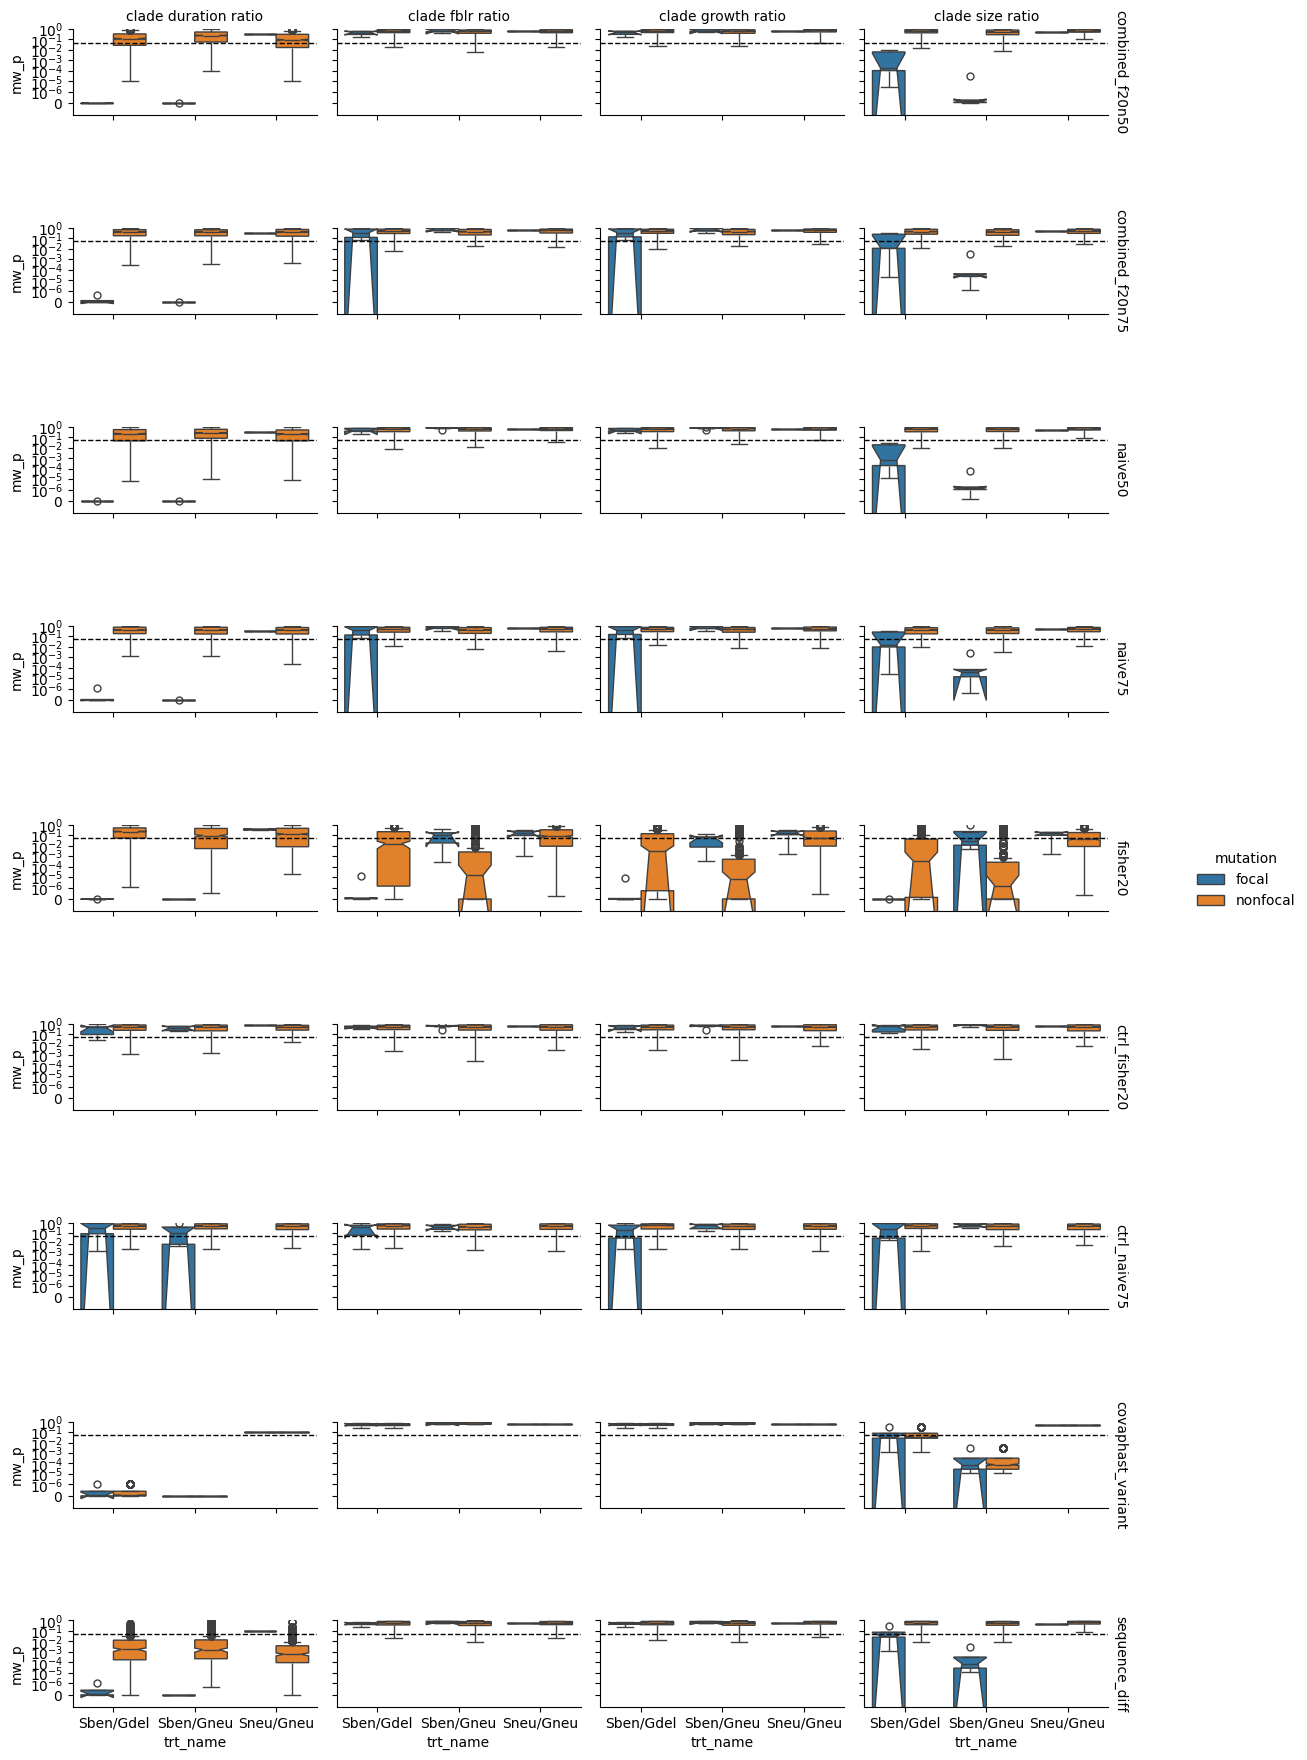

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta+ext=.png


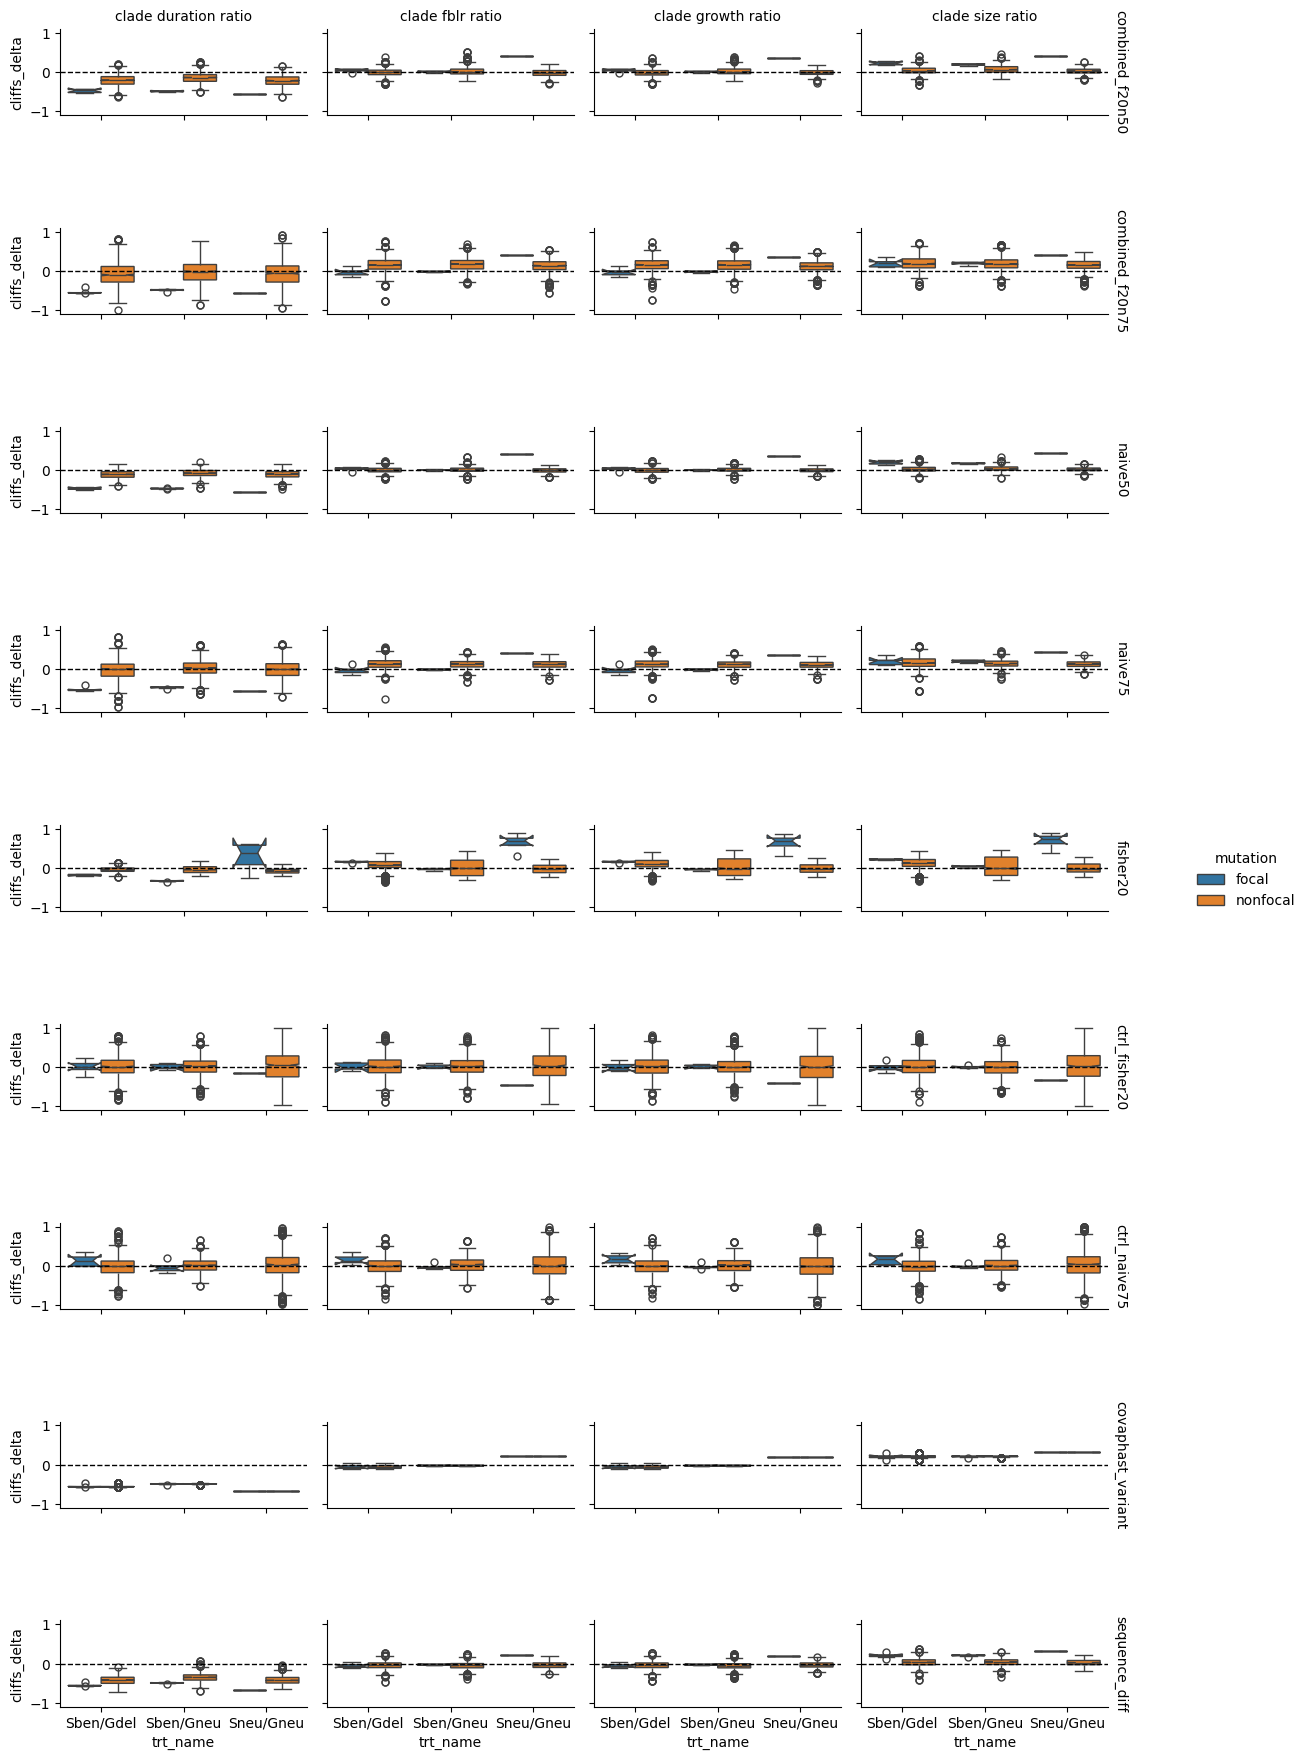

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=mw-p-dropna+ext=.png


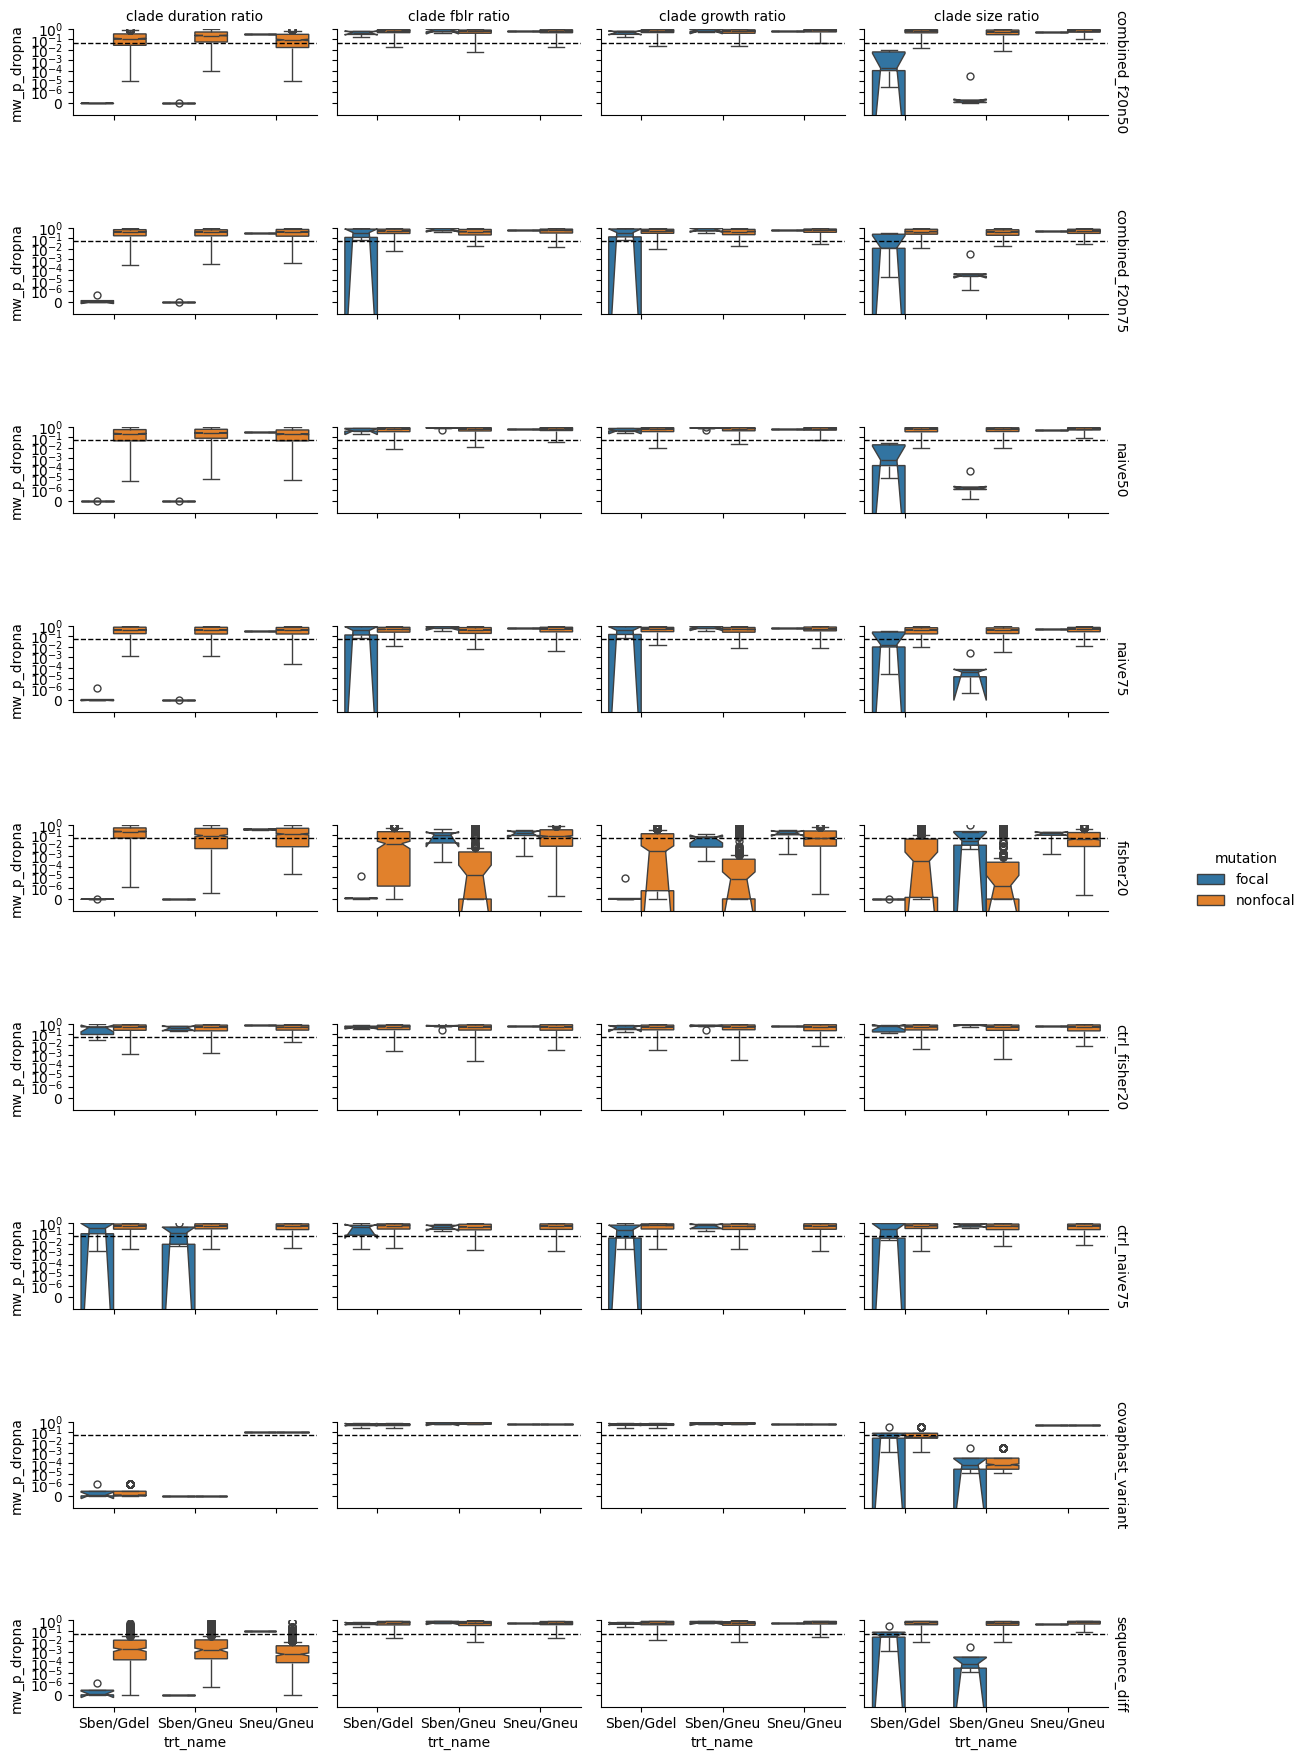

/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.pdf, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.pdf


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:324: UserWarning: teeplot already created file teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.png, overwriting it
  warnings.warn(


teeplots/col=tb-stat+hue=mutation+kind=box+row=screen-name+viz=catplot+x=trt-name+y=cliffs-delta-dropna+ext=.png


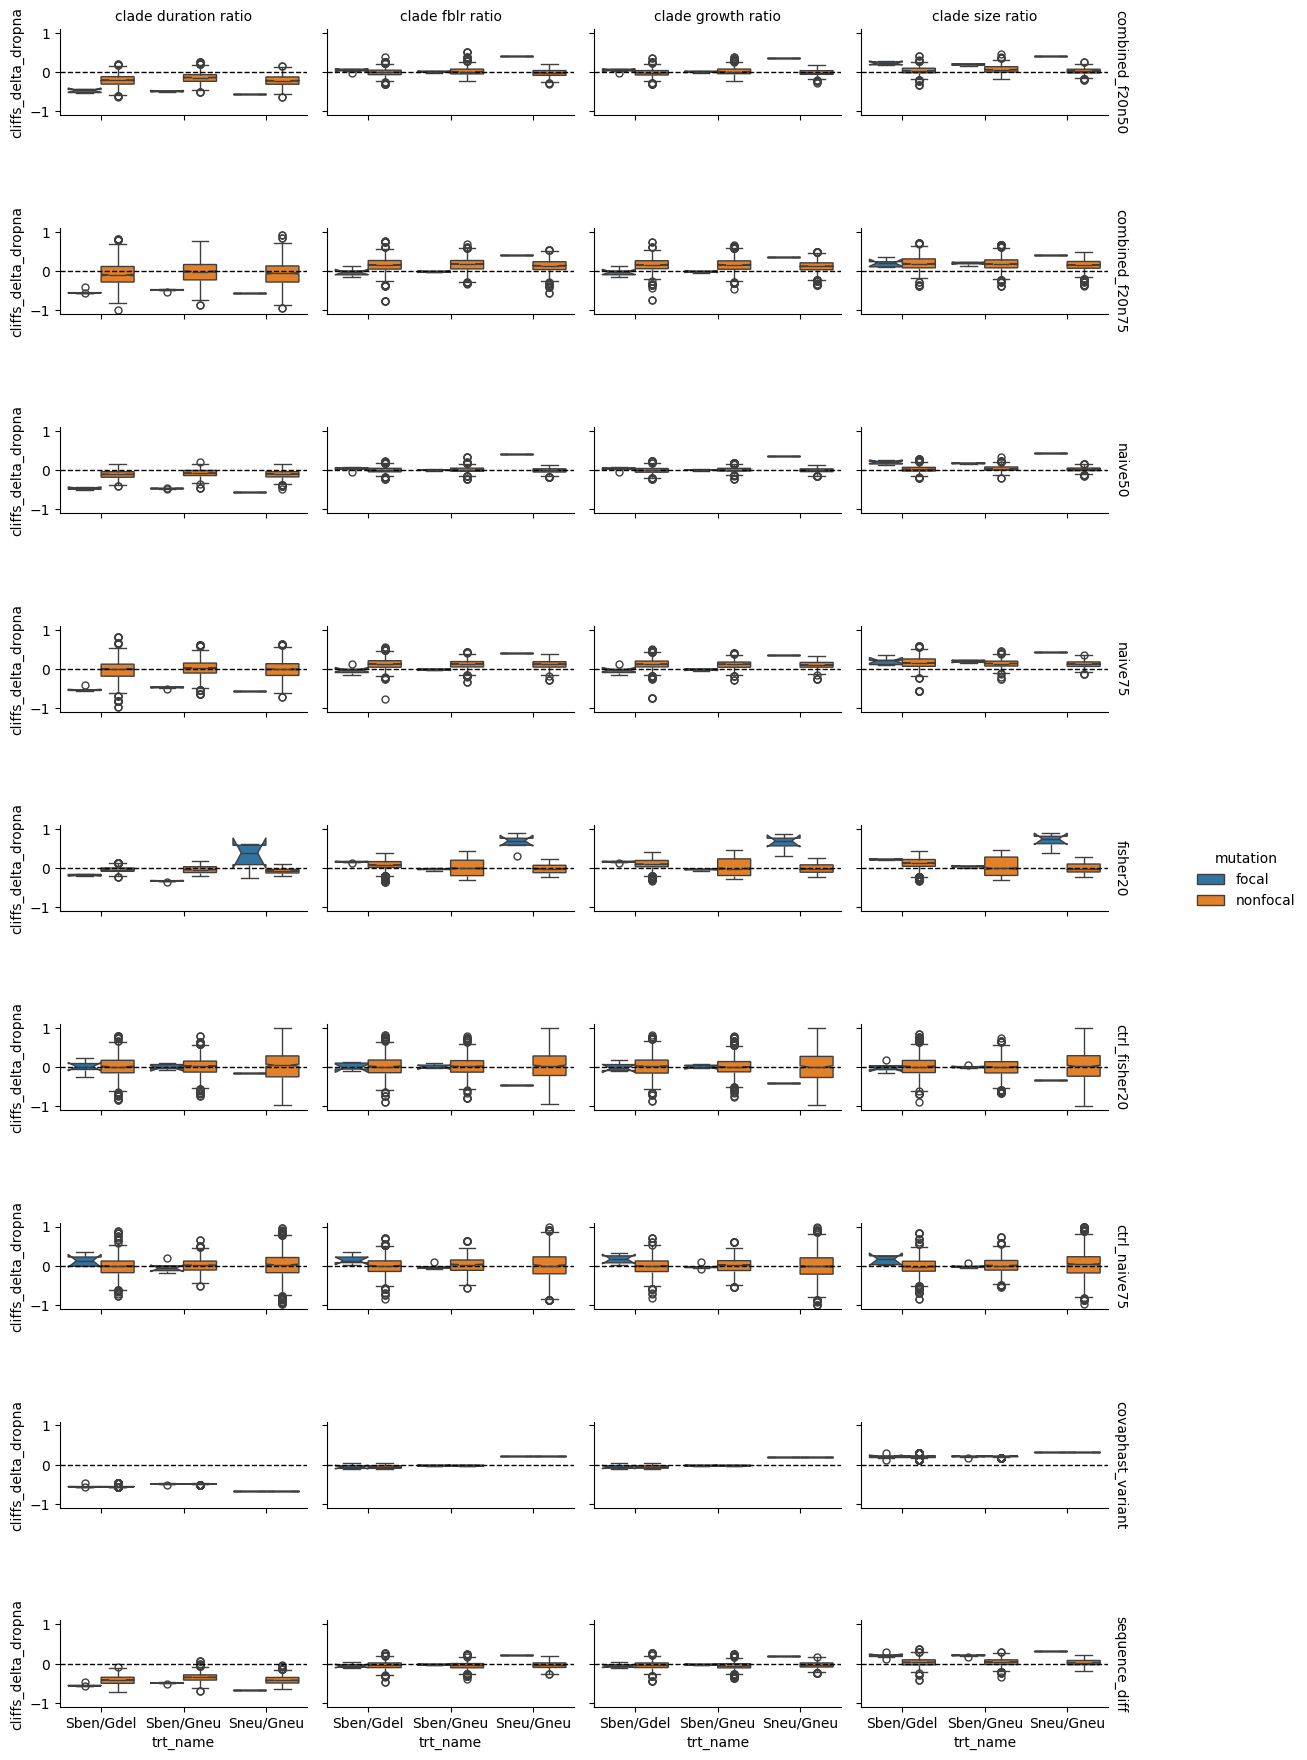

In [14]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    for stat in stats:
        display(HTML(f"<h3>{stat} {min_leaves=}</h3>"))
        with tp.teed(
            sns.catplot,
            data=grp,
            x="trt_name",
            y=stat,
            hue="mutation",
            row="screen_name",
            col="tb_stat",
            kind="box",
            aspect=1.5,
            height=2,
            notch=True,
            margin_titles=True,
        ) as teed:
            teed.set_titles(
                row_template="{row_name}",
                col_template="{col_name}",
            )
            teed.set(
                ylim={
                    "binom_p": (-1e-6, 1),
                    "binom_stat": (-0.05, 1.05),
                    "trinom_p": (-1e-6, 1),
                    "trinom_stat": (-1.1, 1.1),
                    "trinom_p_fill0": (-1e-6, 1),
                    "trinom_stat_fill0": (-1, 1),
                    "mw_p": (-1e-6, 1),
                    "cliffs_delta": (-1.1, 1.1),
                    "mw_p_dropna": (-1e-6, 1),
                    "cliffs_delta_dropna": (-1.1, 1.1),
                }[stat],
            )
            if "_p" not in stat:
                teed.map(
                    plt.axhline,
                    y={
                        "binom_stat": 0.5,
                        "trinom_stat": 0,
                        "trinom_stat_fill0": 0,
                        "cliffs_delta": 0,
                        "cliffs_delta_dropna": 0,
                    }[stat],
                    color="black",
                    linestyle="--",
                    linewidth=1,
                )
            else:
                for ax in teed.axes.flatten():
                    ax.set_yscale("symlog", linthresh=1e-6)

                teed.map(
                    plt.axhline,
                    y=0.05,
                    color="black",
                    linestyle="--",
                    linewidth=1,
                )


In [15]:
stats = (
    "screened_nanmax",
    "screened_nanmean",
    "screened_nanmedian",
    "mut_nobs",
    "binom_n",
    "beq_nanmax",
    "beq_nanmean",
    "screened_frac0",
    "screened_frac1",
    "screened_frac2",
    "screened_frac3",
)


In [16]:
records = []
groups = df[
    (df["trt_hsurf_bits"] == 0)
    & (df["trt_n_downsample"] == df["trt_n_downsample"].max())
    & (df["tb_stat"] == "num_leaves")
].groupby(
    [
        "trt_name",
        "replicate_uuid",
        "screen_uuid",
        "screen_min_leaves",
        "screen_name",
        "tb_stat",
    ],
    observed=True,
)
for (
    trt_name,
    replicate_uuid,
    screen_uuid,
    screen_min_leaves,
    screen_name,
    tb_stat,
), grp in tqdm(
    groups,
):
    grp_focal = grp[grp["is_focal_mutation"]].copy().reset_index(drop=True)

    record = {
        "trt_name": trt_name,
        "replicate_uuid": replicate_uuid,
        "screen_uuid": screen_uuid,
        "screen_min_leaves": screen_min_leaves,
        "screen_name": screen_name,
        "tb_stat": tb_stat,
    }

    records.append(
        {
            **record,
            **{
                stat: (
                    np.nan if len(grp_focal) == 0 else grp_focal[stat].item()
                )
                for stat in stats
            },
            **{"mutation": "focal"},
        },
    )

    try:
        grp_nonfocal = (
            grp[~grp["is_focal_mutation"]]
            .copy()
            .sample(n=100, replace=True)
            .reset_index(drop=True)
        )
        for __, row in grp_nonfocal.iterrows():
            records.append(
                {
                    **record,
                    **{stat: row[stat] for stat in stats},
                    **{"mutation": "nonfocal"},
                },
            )
    except ValueError:
        pass


100%|██████████| 270/270 [00:02<00:00, 108.93it/s]


In [17]:
data = pd.DataFrame(records)


teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=binom-n+ext=.pdf
teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=binom-n+ext=.png


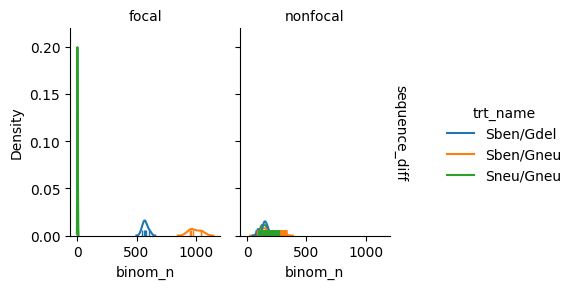

In [18]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    display(HTML(f"<h3>{min_leaves=}</h3>"))
    with tp.teed(
        sns.displot,
        data=grp[
            (grp["tb_stat"] == "num_leaves")
            & (grp["screen_name"] == "sequence_diff")
        ],
        x="binom_n",
        hue="trt_name",
        row="screen_name",
        col="mutation",
        common_norm=False,
        kind="kde",
        rug=True,
        # log_scale=True,
        aspect=0.75,
        height=3,
        facet_kws={"margin_titles": True},
    ) as teed:
        teed.set_titles(
            row_template="{row_name}",
            col_template="{col_name}",
        )
        teed.tight_layout()
    break


teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=mut-nobs+ext=.pdf
teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=mut-nobs+ext=.png


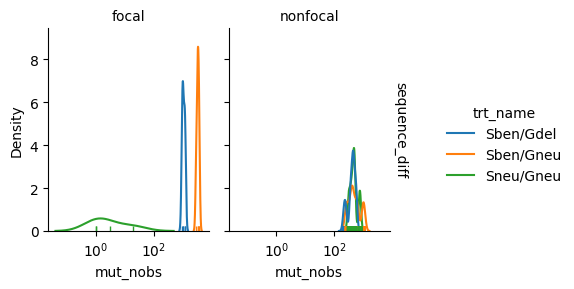

In [19]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    display(HTML(f"<h3>{min_leaves=}</h3>"))
    with tp.teed(
        sns.displot,
        data=grp[
            (grp["tb_stat"] == "num_leaves")
            & (grp["screen_name"] == "sequence_diff")
        ],
        x="mut_nobs",
        hue="trt_name",
        row="screen_name",
        col="mutation",
        common_norm=False,
        kind="kde",
        rug=True,
        log_scale=True,
        aspect=0.75,
        height=3,
        facet_kws={"margin_titles": True},
    ) as teed:
        teed.set_titles(
            row_template="{row_name}",
            col_template="{col_name}",
        )
        teed.tight_layout()
    break


teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=screened-nanmean+ext=.pdf
teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=screened-nanmean+ext=.png


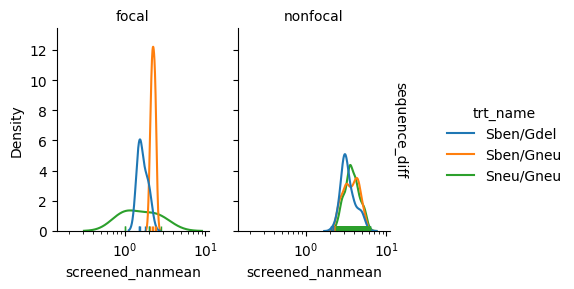

In [20]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    display(HTML(f"<h3>{min_leaves=}</h3>"))
    with tp.teed(
        sns.displot,
        data=grp[
            (grp["tb_stat"] == "num_leaves")
            & (grp["screen_name"] == "sequence_diff")
        ],
        x="screened_nanmean",
        hue="trt_name",
        row="screen_name",
        col="mutation",
        common_norm=False,
        kind="kde",
        rug=True,
        log_scale=True,
        aspect=0.75,
        height=3,
        facet_kws={"margin_titles": True},
    ) as teed:
        teed.set_titles(
            row_template="{row_name}",
            col_template="{col_name}",
        )
        teed.tight_layout()
    break


teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=screened-nanmax+ext=.pdf
teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=screened-nanmax+ext=.png


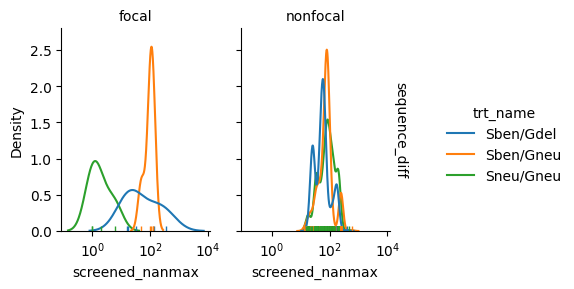

In [21]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    display(HTML(f"<h3>{min_leaves=}</h3>"))
    with tp.teed(
        sns.displot,
        data=grp[
            (grp["tb_stat"] == "num_leaves")
            & (grp["screen_name"] == "sequence_diff")
        ],
        x="screened_nanmax",
        hue="trt_name",
        row="screen_name",
        col="mutation",
        common_norm=False,
        kind="kde",
        rug=True,
        log_scale=True,
        aspect=0.75,
        height=3,
        facet_kws={"margin_titles": True},
    ) as teed:
        teed.set_titles(
            row_template="{row_name}",
            col_template="{col_name}",
        )
        teed.tight_layout()
    break


teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=beq-nanmax+ext=.pdf
teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=beq-nanmax+ext=.png


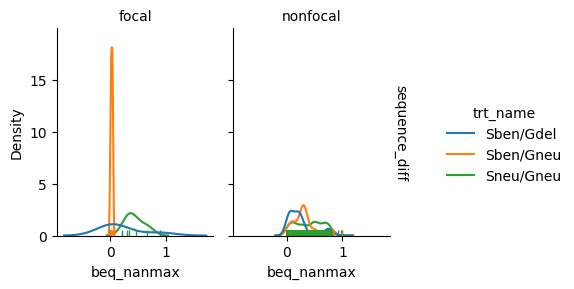

In [22]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    display(HTML(f"<h3>{min_leaves=}</h3>"))
    with tp.teed(
        sns.displot,
        data=grp[
            (grp["tb_stat"] == "num_leaves")
            & (grp["screen_name"] == "sequence_diff")
        ],
        x="beq_nanmax",
        hue="trt_name",
        row="screen_name",
        col="mutation",
        common_norm=False,
        kind="kde",
        rug=True,
        aspect=0.75,
        height=3,
        facet_kws={"margin_titles": True},
    ) as teed:
        teed.set_titles(
            row_template="{row_name}",
            col_template="{col_name}",
        )
        teed.tight_layout()
    break


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:227: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  teed = plotter(*args, **{k: v for k, v in kwargs.items()})


teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=beq-nanmean+ext=.pdf
teeplots/col=mutation+hue=trt-name+kind=kde+row=screen-name+viz=displot+x=beq-nanmean+ext=.png


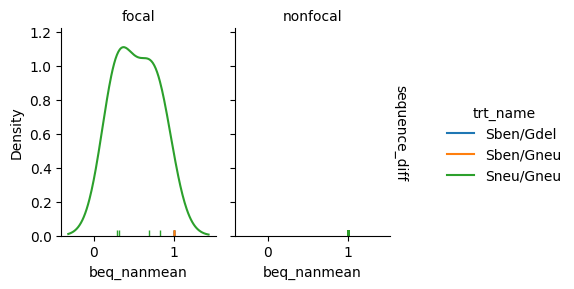

In [23]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    display(HTML(f"<h3>{min_leaves=}</h3>"))
    with tp.teed(
        sns.displot,
        data=grp[
            (grp["tb_stat"] == "num_leaves")
            & (grp["screen_name"] == "sequence_diff")
        ],
        x="beq_nanmean",
        hue="trt_name",
        row="screen_name",
        col="mutation",
        common_norm=False,
        kind="kde",
        rug=True,
        aspect=0.75,
        height=3,
        facet_kws={"margin_titles": True},
    ) as teed:
        teed.set_titles(
            row_template="{row_name}",
            col_template="{col_name}",
        )
        teed.tight_layout()
    break


teeplots/col=trt-name+hue=mutation+kind=kde+row=screen-name+viz=displot+x=screened-nanmean+ext=.pdf
teeplots/col=trt-name+hue=mutation+kind=kde+row=screen-name+viz=displot+x=screened-nanmean+ext=.png


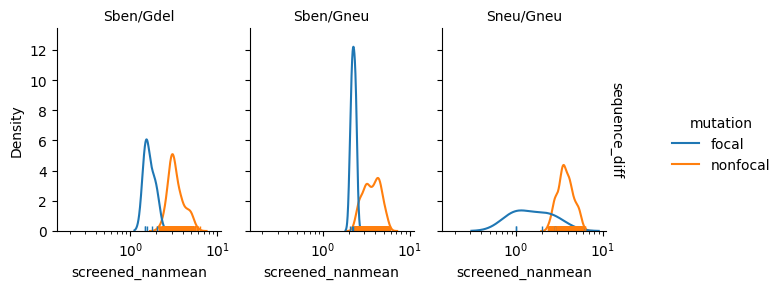

In [24]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    display(HTML(f"<h3>{min_leaves=}</h3>"))
    with tp.teed(
        sns.displot,
        data=grp[
            (grp["tb_stat"] == "num_leaves")
            & (grp["screen_name"] == "sequence_diff")
        ],
        x="screened_nanmean",
        hue="mutation",
        row="screen_name",
        col="trt_name",
        common_norm=False,
        kind="kde",
        rug=True,
        log_scale=True,
        aspect=0.75,
        height=3,
        facet_kws={"margin_titles": True},
    ) as teed:
        teed.set_titles(
            row_template="{row_name}",
            col_template="{col_name}",
        )
        teed.tight_layout()
    break


/usr/local/lib/python3.10/dist-packages/teeplot/teeplot.py:227: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  teed = plotter(*args, **{k: v for k, v in kwargs.items()})


teeplots/col=trt-name+hue=mutation+kind=kde+row=screen-name+viz=displot+x=screened-nanmedian+ext=.pdf
teeplots/col=trt-name+hue=mutation+kind=kde+row=screen-name+viz=displot+x=screened-nanmedian+ext=.png


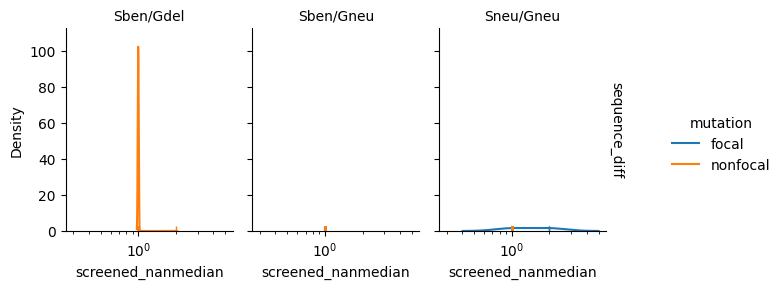

In [25]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    display(HTML(f"<h3>{min_leaves=}</h3>"))
    with tp.teed(
        sns.displot,
        data=grp[
            (grp["tb_stat"] == "num_leaves")
            & (grp["screen_name"] == "sequence_diff")
        ],
        x="screened_nanmedian",
        hue="mutation",
        row="screen_name",
        col="trt_name",
        common_norm=False,
        kind="kde",
        rug=True,
        log_scale=True,
        aspect=0.75,
        height=3,
        facet_kws={"margin_titles": True},
    ) as teed:
        teed.set_titles(
            row_template="{row_name}",
            col_template="{col_name}",
        )
        teed.tight_layout()
    break


teeplots/col=trt-name+hue=mutation+kind=box+row=screen-name+viz=catplot+y=screened-frac0+ext=.pdf
teeplots/col=trt-name+hue=mutation+kind=box+row=screen-name+viz=catplot+y=screened-frac0+ext=.png


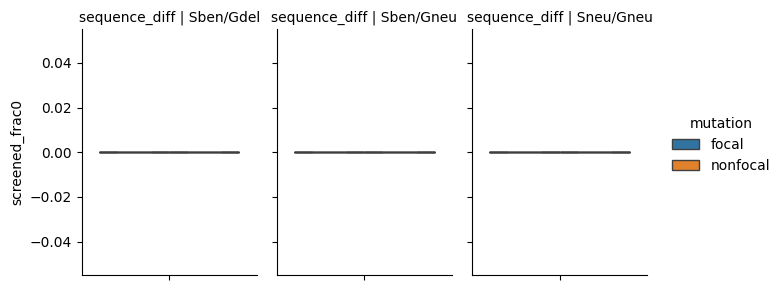

teeplots/col=trt-name+hue=mutation+kind=box+row=screen-name+viz=catplot+y=screened-frac1+ext=.pdf
teeplots/col=trt-name+hue=mutation+kind=box+row=screen-name+viz=catplot+y=screened-frac1+ext=.png


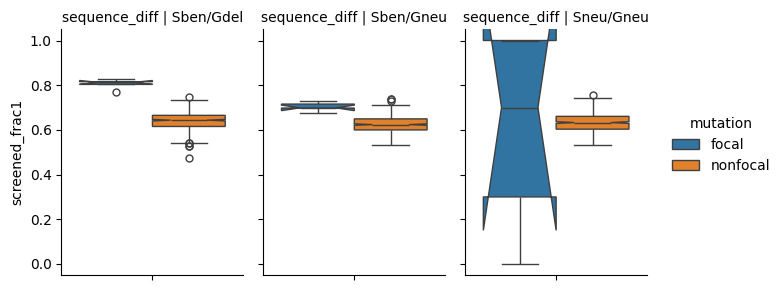

teeplots/col=trt-name+hue=mutation+kind=box+row=screen-name+viz=catplot+y=screened-frac2+ext=.pdf
teeplots/col=trt-name+hue=mutation+kind=box+row=screen-name+viz=catplot+y=screened-frac2+ext=.png


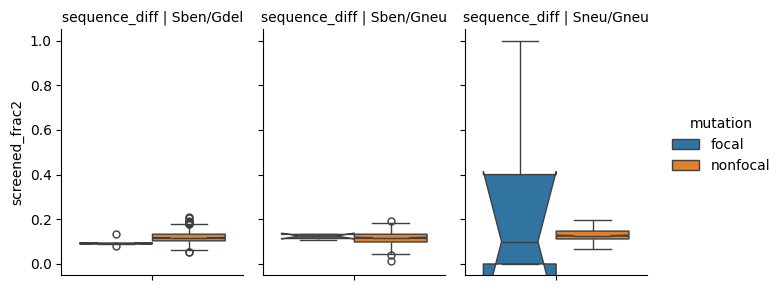

teeplots/col=trt-name+hue=mutation+kind=box+row=screen-name+viz=catplot+y=screened-frac3+ext=.pdf
teeplots/col=trt-name+hue=mutation+kind=box+row=screen-name+viz=catplot+y=screened-frac3+ext=.png


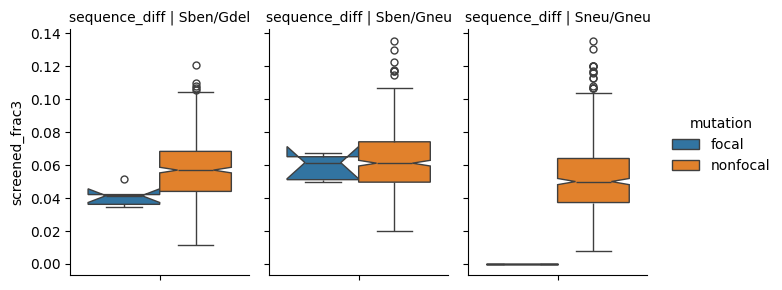

In [26]:
for min_leaves, grp in data.groupby("screen_min_leaves"):
    for n in range(4):
        display(HTML(f"<h3>{min_leaves=} {n=}</h3>"))
        with tp.teed(
            sns.catplot,
            data=grp[
                (grp["tb_stat"] == "num_leaves")
                & (grp["screen_name"] == "sequence_diff")
            ],
            y=f"screened_frac{n}",
            hue="mutation",
            row="screen_name",
            col="trt_name",
            kind="box",
            notch=True,
            aspect=0.75,
            height=3,
        ) as teed:
            teed.set_titles(
                row_template="{row_name}",
                col_template="{col_name}",
            )
            teed.tight_layout()
    break


In [27]:
df.loc[
    (df["trt_name"] == "Sben/Gneu")
    & (df["mut_char_pos"] == 0)
    & (df["tb_stat"].str.endswith("ratio")),
    [
        "mut_nobs",
        "mut_freq",
        "binom_n",
        "binom_k",
        "binom_p",
        "mw_p_dropna",
        "tb_stat",
        "screened_N",
        "trt_name",
        "mut_char_pos",
        "screened_nanmean",
    ],
].sample(25)


mut_nobs  mut_freq  binom_n  binom_k       binom_p   mw_p_dropna  \
12790       3370  0.039772      146       76  6.791635e-01  6.380064e-01   
50957       3633  0.042952      105       56  5.583943e-01  5.752974e-01   
50949       3633  0.042952     1026      524  5.120946e-01  1.207757e-01   
63661       3368  0.039764       55       29  7.877062e-01  5.426673e-01   
12745       3370  0.039772      272      139  7.618253e-01  5.299377e-01   
38190       3014  0.035474      129       68  5.974850e-01  6.088144e-01   
50968       3633  0.042952      154       81  5.728460e-01  4.343249e-01   
38192       3014  0.035474      934      883  0.000000e+00  0.000000e+00   
101861      3812  0.045063      140       73  6.727565e-01  8.138790e-01   
50969       3633  0.042952       63       28  4.499625e-01  5.173174e-01   
12771       3370  0.039772     1080      567  1.067580e-01  6.774293e-02   
50967       3633  0.042952     1005      444  2.493926e-04  2.967975e-02   
38210       3014  0.035474      955      423  4.683511e-04  3.545157e-06   
50906       3633  0.042952      398      350  0.000000e+00  7.944135e-29   
101834      3812  0.045063     1404      676  1.734637e-01  5.846745e-02   
12780       3370  0.039772      487      128  2.122780e-26  3.807048e-19   
38198       3014  0.035474      357      127  5.480642e-08  5.196758e-11   
38213       3014  0.035474       99       49  1.000000e+00  9.542018e-01   
38223       3014  0.035474      963      513  4.566899e-02  3.741019e-04   
63648       3368  0.039764      503      208  1.213665e-04  8.114114e-07   
101822      3812  0.045063     1024      971  0.000000e+00  0.000000e+00   
38191       3014  0.035474       65       35  6.201448e-01  9.752962e-01   
101867      3812  0.045063      284      102  2.387844e-06  1.776507e-06   
38245       3014  0.035474       62       32  8.990763e-01  7.872356e-01   
12777       3370  0.039772      125       71  1.521209e-01  5.834210e-01   

                     tb_stat  screened_N   trt_name  mut_char_pos  \
12790       clade size ratio         158  Sben/Gneu             0   
50957     clade growth ratio         106  Sben/Gneu             0   
50949     clade growth ratio        1028  Sben/Gneu             0   
63661       clade fblr ratio          55  Sben/Gneu             0   
12745       clade fblr ratio         273  Sben/Gneu             0   
38190   clade duration ratio         130  Sben/Gneu             0   
50968       clade size ratio         164  Sben/Gneu             0   
38192   clade duration ratio         958  Sben/Gneu             0   
101861    clade growth ratio         140  Sben/Gneu             0   
50969       clade size ratio          67  Sben/Gneu             0   
12771     clade growth ratio        1081  Sben/Gneu             0   
50967       clade size ratio        1028  Sben/Gneu             0   
38210       clade fblr ratio         958  Sben/Gneu             0   
50906   clade duration ratio         406  Sben/Gneu             0   
101834      clade fblr ratio        1406  Sben/Gneu             0   
12780       clade size ratio         544  Sben/Gneu             0   
38198       clade fblr ratio         357  Sben/Gneu             0   
38213       clade fblr ratio          99  Sben/Gneu             0   
38223     clade growth ratio         963  Sben/Gneu             0   
63648       clade fblr ratio         503  Sben/Gneu             0   
101822  clade duration ratio        1043  Sben/Gneu             0   
38191   clade duration ratio          65  Sben/Gneu             0   
101867      clade size ratio         323  Sben/Gneu             0   
38245       clade size ratio          65  Sben/Gneu             0   
12777     clade growth ratio         126  Sben/Gneu             0   

        screened_nanmean  
12790           0.082531  
50957           0.001988  
50949           0.010097  
63661           0.002601  
12745          -0.002286  
38190                NaN  
50968           0.099884  
38192               

In [28]:
df.loc[
    (df["trt_name"] == "Sben/Gneu")
    & (df["mut_char_pos"] == 0)
    & (df["tb_stat"].str.endswith("ratio")),
    [
        "mut_nobs",
        "mut_freq",
        "binom_n",
        "binom_k",
        "binom_p",
        "mw_p_dropna",
        "tb_stat",
        "screened_N",
        "trt_name",
        "mut_char_pos",
        "screened_nanmean",
    ],
].sample(25)


mut_nobs  mut_freq  binom_n  binom_k       binom_p   mw_p_dropna  \
63637       3368  0.039764      153      130  2.544110e-19  1.325906e-24   
50956       3633  0.042952      972      468  2.615860e-01  3.249057e-03   
38239       3014  0.035474      114       32  3.138525e-06  1.359753e-05   
101875      3812  0.045063       69       34  1.000000e+00  7.497187e-01   
50950       3633  0.042952      163       83  8.755811e-01  5.982643e-01   
50915       3633  0.042952       66       27  1.752858e-01  2.138734e-01   
101811      3812  0.045063      174      154  8.187218e-27  5.965290e-33   
38213       3014  0.035474       99       49  1.000000e+00  9.542018e-01   
50923       3633  0.042952      252      132  4.884260e-01  9.862311e-01   
38192       3014  0.035474      934      883  0.000000e+00  0.000000e+00   
63655       3368  0.039764      155       83  4.219388e-01  5.764830e-01   
12789       3370  0.039772     1031      458  3.798080e-04  1.096758e-02   
50918       3633  0.042952      960      907  0.000000e+00  0.000000e+00   
101827      3812  0.045063      287      153  2.879884e-01  6.186420e-01   
12764       3370  0.039772      410      160  1.023973e-05  1.363560e-05   
38211       3014  0.035474       99       49  1.000000e+00  9.542018e-01   
38245       3014  0.035474       62       32  8.990763e-01  7.872356e-01   
38195       3014  0.035474       98       88  9.940660e-17  4.019153e-17   
50939       3633  0.042952      105       56  5.583943e-01  5.916324e-01   
12754       3370  0.039772      157       79  1.000000e+00  6.663477e-01   
50966       3633  0.042952     1256      507  9.047364e-12  6.650290e-04   
38193       3014  0.035474       98       88  9.940660e-17  4.019153e-17   
50907       3633  0.042952      149      126  2.120523e-18  8.763946e-24   
12757       3370  0.039772       65       28  3.210841e-01  1.681524e-01   
63638       3368  0.039764     1263      979  0.000000e+00  4.873196e-38   

                     tb_stat  screened_N   trt_name  mut_char_pos  \
63637   clade duration ratio         155  Sben/Gneu             0   
50956     clade growth ratio         976  Sben/Gneu             0   
38239       clade size ratio         131  Sben/Gneu             0   
101875      clade size ratio          72  Sben/Gneu             0   
50950     clade growth ratio         164  Sben/Gneu             0   
50915   clade duration ratio          67  Sben/Gneu             0   
101811  clade duration ratio         176  Sben/Gneu             0   
38213       clade fblr ratio          99  Sben/Gneu             0   
50923       clade fblr ratio         254  Sben/Gneu             0   
38192   clade duration ratio         958  Sben/Gneu             0   
63655       clade fblr ratio         155  Sben/Gneu             0   
12789       clade size ratio        1081  Sben/Gneu             0   
50918   clade duration ratio         976  Sben/Gneu             0   
101827      clade fblr ratio         288  Sben/Gneu             0   
12764     clade growth ratio         412  Sben/Gneu             0   
38211       clade fblr ratio          99  Sben/Gneu             0   
38245       clade size ratio          65  Sben/Gneu             0   
38195   clade duration ratio          99  Sben/Gneu             0   
50939       clade fblr ratio         106  Sben/Gneu             0   
12754       clade fblr ratio         158  Sben/Gneu             0   
50966       clade size ratio        1299  Sben/Gneu             0   
38193   clade duration ratio          99  Sben/Gneu             0   
50907   clade duration ratio         151  Sben/Gneu             0   
12757       clade fblr ratio          65  Sben/Gneu             0   
63638   clade duration ratio        1279  Sben/Gneu             0   

        screened_nanmean  
63637           0.439613  
50956          -0.003629  
38239          -0.463989  
101875          0.101344  
50950           0.000399  
50915          -0.084016  
101811          0.519248  
38213           0.00

In [29]:
df.loc[
    (df["trt_name"] == "Sneu/Gneu")
    & (df["mut_char_pos"] == 0)
    & (df["tb_stat"].str.endswith("ratio")),
    [
        "mut_nobs",
        "mut_freq",
        "binom_n",
        "binom_k",
        "binom_p",
        "mw_p_dropna",
        "tb_stat",
        "screened_N",
        "trt_name",
        "mut_char_pos",
        "screened_nanmean",
    ],
].sample(25)


mut_nobs  mut_freq  binom_n  binom_k  binom_p  mw_p_dropna  \
127280         1  0.000012        0        0      NaN          NaN   
127274         1  0.000012        1        0    1.000     0.278461   
127279         1  0.000012        0        0      NaN          NaN   
165381        20  0.000236        2        0    0.500     0.440296   
165360        20  0.000236        0        0      NaN          NaN   
165362        20  0.000236        5        2    1.000     0.803589   
25490          1  0.000012        0        0      NaN          NaN   
127313         1  0.000012        0        0      NaN          NaN   
114542         3  0.000036        4        3    0.625     0.571202   
25478          1  0.000012        1        0    1.000     0.149522   
127322         1  0.000012        1        0    1.000     0.125096   
114605         3  0.000036        0        0      NaN          NaN   
114552         3  0.000036        0        0      NaN          NaN   
25482          1  0.000012        0        0      NaN          NaN   
165378        20  0.000236        0        0      NaN          NaN   
114587         3  0.000036        0        0      NaN          NaN   
114574         3  0.000036        2        2    0.500     0.604832   
165316        20  0.000236        7        4    1.000     0.708246   
165351        20  0.000236        1        0    1.000     0.638546   
127308         1  0.000012        0        0      NaN          NaN   
127307         1  0.000012        0        0      NaN          NaN   
114558         3  0.000036        1        1    1.000     0.529690   
165340        20  0.000236        1        1    1.000     0.361264   
25469          1  0.000012        0        0      NaN          NaN   
127297         1  0.000012        0        0      NaN          NaN   

                     tb_stat  screened_N   trt_name  mut_char_pos  \
127280      clade fblr ratio           0  Sneu/Gneu             0   
127274  clade duration ratio           1  Sneu/Gneu             0   
127279      clade fblr ratio           0  Sneu/Gneu             0   
165381      clade size ratio           2  Sneu/Gneu             0   
165360    clade growth ratio           0  Sneu/Gneu             0   
165362    clade growth ratio           5  Sneu/Gneu             0   
25490     clade growth ratio           0  Sneu/Gneu             0   
127313    clade growth ratio           0  Sneu/Gneu             0   
114542  clade duration ratio           4  Sneu/Gneu             0   
25478       clade fblr ratio           1  Sneu/Gneu             0   
127322      clade size ratio           1  Sneu/Gneu             0   
114605      clade size ratio           0  Sneu/Gneu             0   
114552      clade fblr ratio           0  Sneu/Gneu             0   
25482       clade fblr ratio           0  Sneu/Gneu             0   
165378      clade size ratio           0  Sneu/Gneu             0   
114587    clade growth ratio           0  Sneu/Gneu             0   
114574    clade growth ratio           2  Sneu/Gneu             0   
165316  clade duration ratio           7  Sneu/Gneu             0   
165351    clade growth ratio           1  Sneu/Gneu             0   
127308    clade growth ratio           0  Sneu/Gneu             0   
127307    clade growth ratio           0  Sneu/Gneu             0   
114558      clade fblr ratio           1  Sneu/Gneu             0   
165340      clade fblr ratio           1  Sneu/Gneu             0   
25469   clade duration ratio           0  Sneu/Gneu             0   
127297    clade growth ratio           0  Sneu/Gneu             0   

        screened_nanmean  
127280               NaN  
127274         -1.178655  
127279               NaN  
165381         -0.660878  
165360               NaN  
165362         -0.003798  
25490                NaN  
127313               NaN  
114542          0.254114  
25478          -0.061477  
127322         -5.050133  
114605               NaN  
114552               NaN  
25482         